# Part 1: comparing tax rates of the 2 groups

in my original project I used a very amature approach to determine if queer communities paid more or fewer taxes comapred to the general population - I did this improperly using data vizualization techniques

//add images

in this section I will attempt to use regression methods to not only determine correlation & comparison - but also to compare insights in other parameters of the groups

In [1]:
# starting out with data cleaning

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

gaybourhoods = pd.read_csv("data/gaybourhoods.csv")
# gaybourhoods.head(5)

## take the dataset & add long/lat
## props to Nat for creating the backbone I used to zipcode -> long/lat

cords = pd.read_csv("data/zip_lat_long.csv")
gaydf = pd.read_csv("data/tax_and_gay.csv")

gaydf = gaydf.merge(cords, left_on="zip", right_on="ZIP")
gaydf = gaydf.rename({
    "LAT": "lat",
    "LNG": "long",
}, axis="columns")
del gaydf['zip.1']
del gaydf['ZIP']

print(gaydf.describe())
print("------------------------------------------------------------------------")
print(gaydf)

                zip     population  gay tax rate  overall tax paid  income  \
count   2184.000000    2184.000000   2184.000000       2184.000000  2184.0   
mean   48935.203297   26691.730769   4373.997253        596.719322     1.0   
std    35451.335807   17960.713867   3054.620840        615.174358     0.0   
min     1730.000000     160.000000      0.000000          0.000000     1.0   
25%    11360.750000   13337.500000   2110.000000        217.000000     1.0   
50%    60023.500000   24070.000000   3900.000000        434.000000     1.0   
75%    80227.250000   35640.000000   5902.500000        777.250000     1.0   
max    98686.000000  114420.000000  24560.000000       9166.000000     1.0   

               lat         long  
count  2184.000000  2184.000000  
mean     38.016518   -91.296804  
std       5.210272    18.476699  
min      25.572213  -123.118977  
25%      33.997027  -105.037767  
50%      39.930150   -87.603617  
75%      40.960828   -74.310179  
max      47.916786   -70.

in the original project I began with a few plots

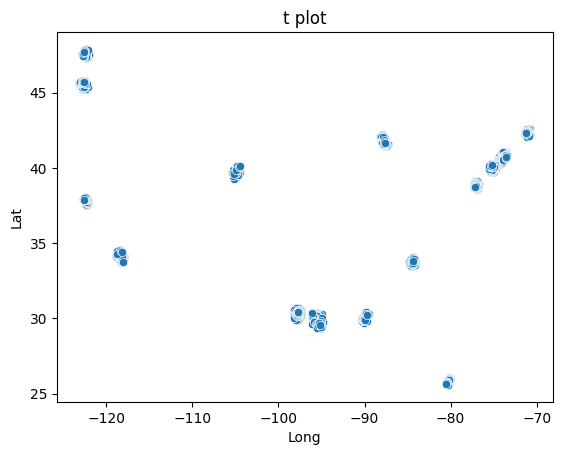

In [2]:
plot1 = sns.scatterplot(data=gaydf, x="long", y="lat"); _ = plot1.set(xlabel="Long", ylabel="Lat", title="t plot")

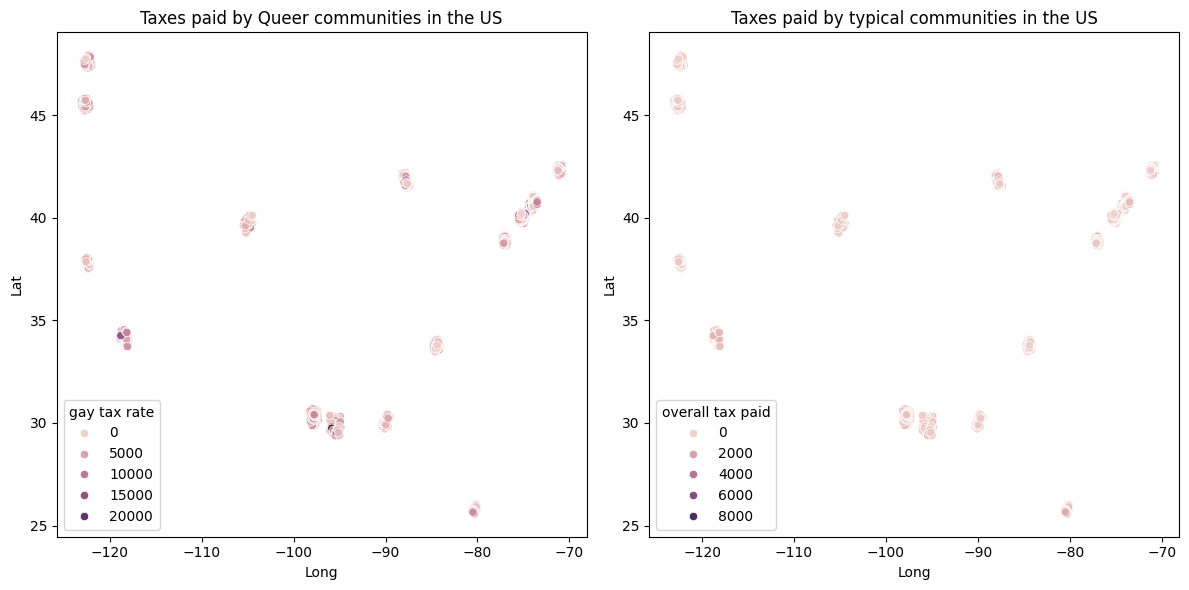

In [3]:
gaydfgaytaxplot = gaydf.copy(); gaydfgentaxplot = gaydf.copy()

del gaydfgaytaxplot['zip']; del gaydfgaytaxplot['population']; del gaydfgaytaxplot['overall tax paid']; del gaydfgaytaxplot['income']

del gaydfgentaxplot['zip']; del gaydfgentaxplot['population']; del gaydfgentaxplot['income']

plt.figure(figsize=(12, 6));    plt.subplot(1, 2, 1)
plot1 = sns.scatterplot(data=gaydfgaytaxplot, x="long", y="lat", hue='gay tax rate')
_ = plot1.set(xlabel="Long", ylabel="Lat", title="Taxes paid by Queer communities in the US")

plt.subplot(1, 2, 2)
plot2 = sns.scatterplot(data=gaydfgentaxplot, x="long", y="lat", hue='overall tax paid')
_ = plot2.set(xlabel="Long", ylabel="Lat", title="Taxes paid by typical communities in the US")

plt.tight_layout();     plt.show()

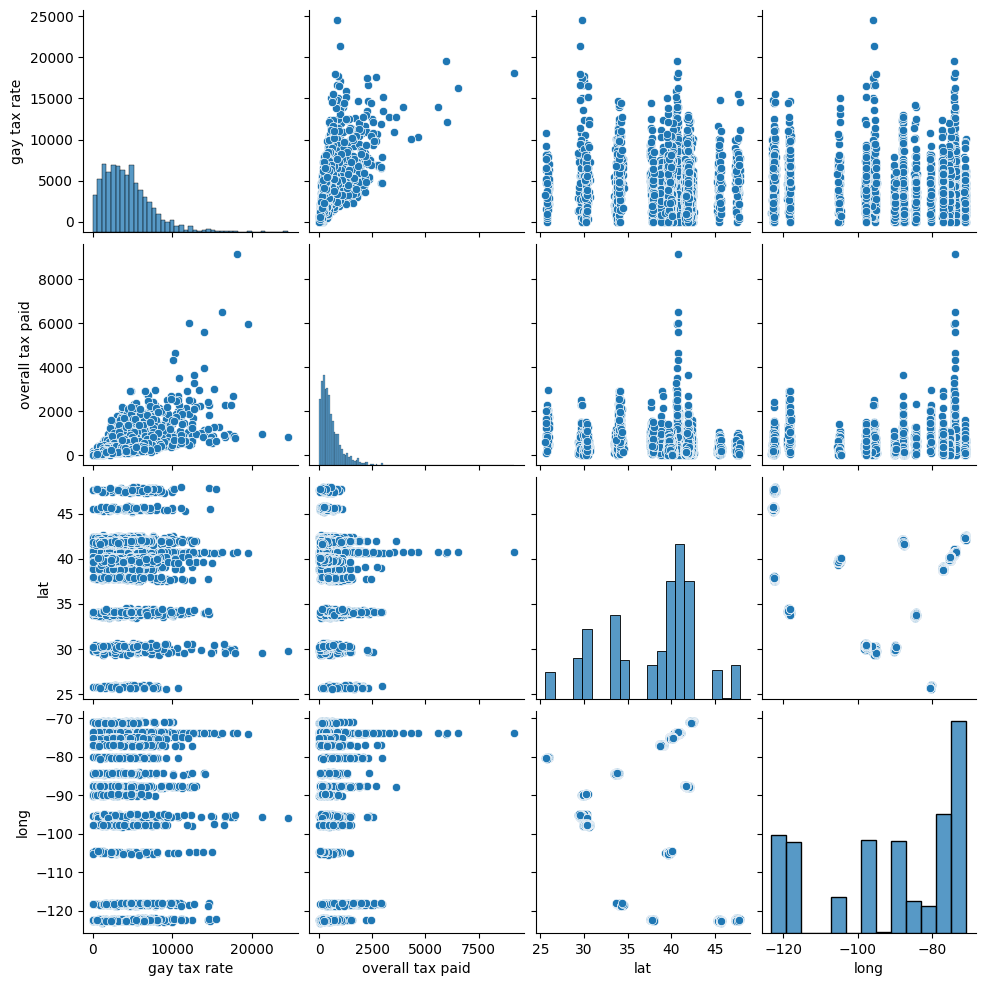

In [4]:
gaydfhybridplot = pd.merge(gaydfgentaxplot, gaydfgaytaxplot); sns.pairplot(gaydfhybridplot)

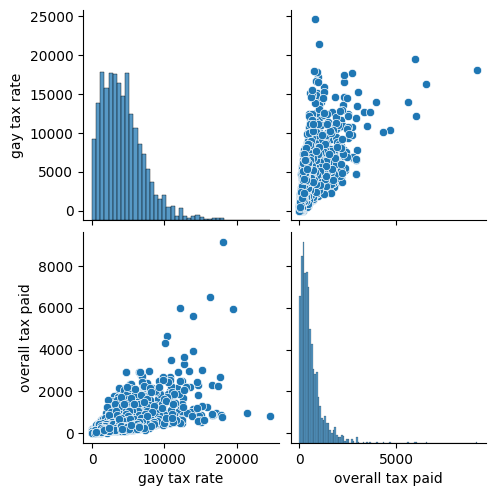

In [5]:
gaydflight = gaydfhybridplot.copy(); del gaydflight['lat']; del gaydflight['long']; sns.pairplot(gaydflight)

The first thing I noticed looking back at it was all I observed during the first pass was a simple ratio - so to start off the more in depth analysis im going to make a line plot to visualize the distribution

In [6]:
gaydf['gaytax per income'] = gaydf['gay tax rate'] / gaydf['income']
gaydf['overalltax per income'] = gaydf['overall tax paid'] / gaydf['income']

print(gaydf)
print("--------")
print(gaydf.columns)

        zip  population  gay tax rate  overall tax paid  income        lat  \
0      1730     13570.0          3260             150.0       1  42.499295   
1      1731      2450.0           550               0.0       1  42.456748   
2      1742     17170.0          4220             297.0       1  42.462911   
3      1760     34350.0          7880             468.0       1  42.284822   
4      1770      4310.0          1060              46.0       1  42.231947   
...     ...         ...           ...               ...     ...        ...   
2179  98682     57010.0         11080             703.0       1  45.673209   
2180  98683     30700.0          6470             358.0       1  45.603287   
2181  98684     27630.0          5390             371.0       1  45.630556   
2182  98685     27540.0          6490             298.0       1  45.715211   
2183  98686     17800.0          4120             215.0       1  45.723392   

            long  gaytax per income  overalltax per income  
0 

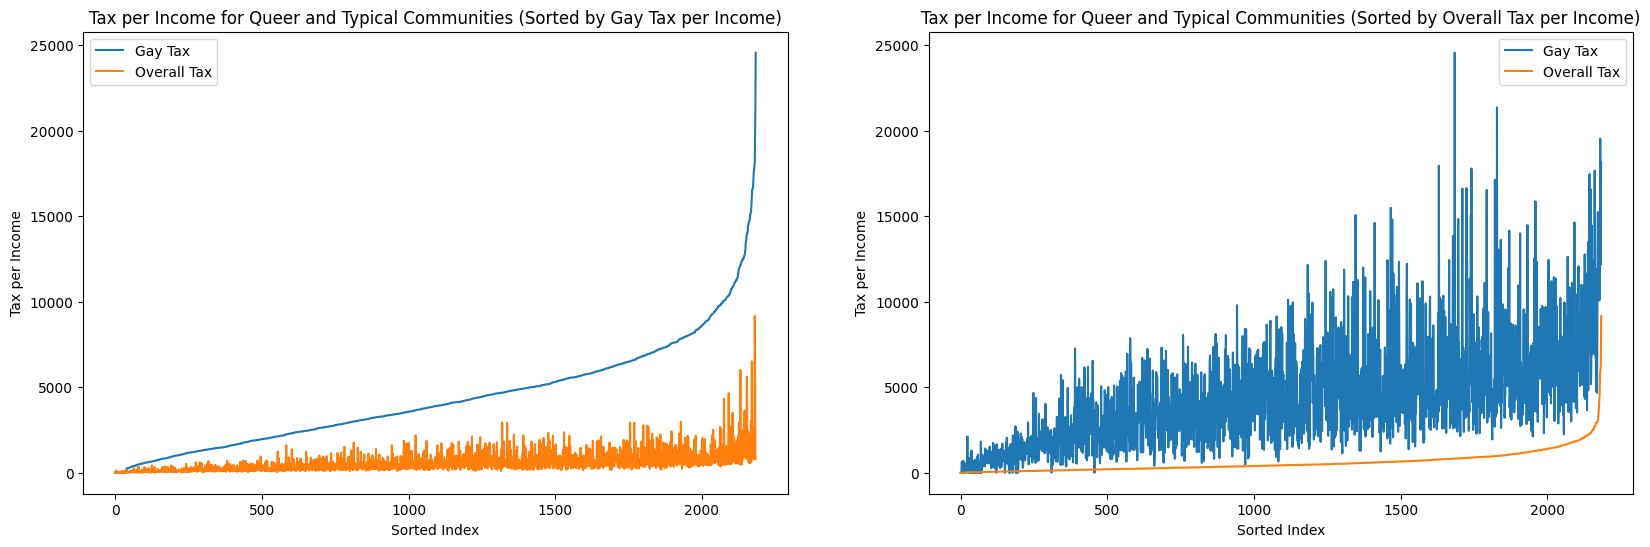

In [7]:
sorted_gaydf = gaydf.sort_values(by='gaytax per income');   sorted_gendf = gaydf.sort_values(by='overalltax per income')
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='gaytax per income', label='Gay Tax', ax=axes[0])
sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='overalltax per income', label='Overall Tax', ax=axes[0])
axes[0].set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Gay Tax per Income)')

sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='gaytax per income', label='Gay Tax', ax=axes[1])
sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='overalltax per income', label='Overall Tax', ax=axes[1])
axes[1].set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Overall Tax per Income)')

plt.show()

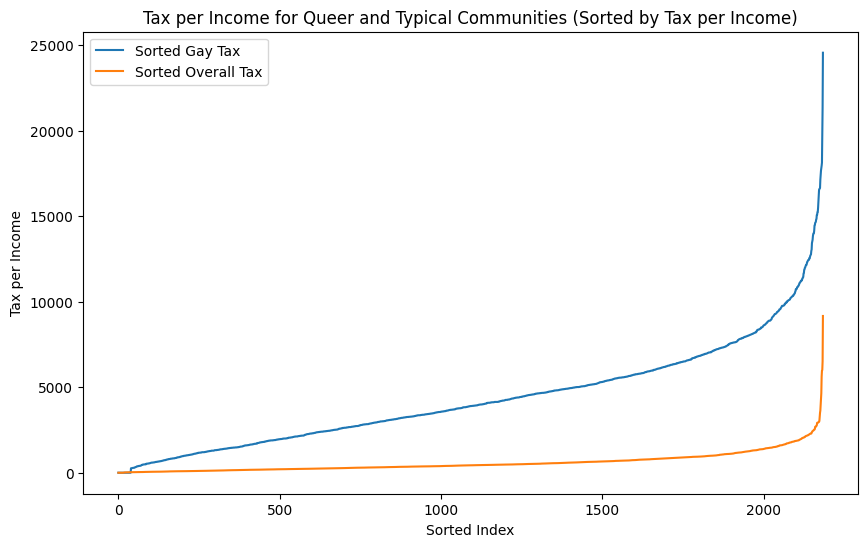

In [8]:
plt.figure(figsize=(10, 6))
lineplot = sns.lineplot(data=sorted_gaydf, x=range(len(sorted_gaydf)), y='gaytax per income', label='Sorted Gay Tax')
lineplot = sns.lineplot(data=sorted_gendf, x=range(len(sorted_gendf)), y='overalltax per income', label='Sorted Overall Tax')
lineplot.set(xlabel='Sorted Index', ylabel='Tax per Income', title='Tax per Income for Queer and Typical Communities (Sorted by Tax per Income)')
plt.legend();       plt.show()

with that established, lets try making a simple linear model

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ['zip', 'population', 'gay tax rate', 'overall tax paid', 'income', 'lat', 'long', 'gaytax per income', 'overalltax per income']

# Rename the columns to remove spaces
gaydf = gaydf.rename(columns={'overall tax paid': 'overall_tax_paid', 'gay tax rate': 'gay_tax_rate'})

lm1ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate', data=gaydf).fit()
lm2ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + lat + long', data=gaydf).fit()
lm3ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + population', data=gaydf).fit()

print(lm1ov.params)
print(lm2ov.params)
print(lm3ov.params)

Intercept       84.695506
gay_tax_rate     0.117061
dtype: float64
Intercept       893.208385
gay_tax_rate      0.117429
lat             -18.000063
long              1.378168
dtype: float64
Intercept      -59.912135
gay_tax_rate    -0.027664
population       0.029134
dtype: float64


In [10]:
lm1gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid', data=gaydf).fit()
lm2gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + lat + long', data=gaydf).fit()
lm3gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + population', data=gaydf).fit()

print(lm1gy.params)
print(lm2gy.params)
print(lm3gy.params)

Intercept           2651.732441
overall_tax_paid       2.886223
dtype: float64
Intercept          -1001.317225
overall_tax_paid       2.912113
lat                   45.851348
long                 -20.750909
dtype: float64
Intercept           507.065467
overall_tax_paid     -0.424010
population            0.154353
dtype: float64


considering the gay linear models follow the overall linear models - we can conclude the queer communities taxes follow the overall trend alot more then the vizualziations would elad you to think

other then that no meaningful correlation can be measured through lat/long - but this could be further investigated via comparing the CBD's of the metropolitan areas included in the data

for the next section I will add more data to try & improove the linar models above

In [11]:
cens1 = pd.read_csv("data/census20211.csv");# cens2 = pd.read_csv("data/census20212.csv"); cens3 = pd.read_csv("data/census20213.csv")

C:\Users\samia\AppData\Local\Temp\ipykernel_9644\2678940721.py:1: DtypeWarning: Columns (2,3,6,9,10,13,14,17,18,21,22,23,24,25,26,27,28,29,30,31,34,37,38,41,42,45,46,47,50,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,69,70,71,72,73,74,77,78,79,80,81,82,85,86,87,88,89,90,91,92,93,94,97,98,101,102,105,106,109,110,113,114,117,118,121,122,125,126,129,130,131,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,281,282,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,

In [12]:
cen1 = pd.DataFrame(cens1);# cen2 = cens2; cen2 = cens3

print(cen1.iloc[0])

# delete error things
for i in range(1, 90):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'MA']
    del cen1[column_name + 'EA']
    del cen1[column_name + 'M']
# delete unneded categories
for i in range(5, 18):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'E']
for i in range(19, 86):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'E']
for i in range(1, 90):
    column_name = 'DP05_{:04d}'.format(i)
    del cen1[column_name + 'PMA']
    del cen1[column_name + 'PEA']
    del cen1[column_name + 'PM']
    del cen1[column_name + 'PE']
columns_to_delete = ['DP05_0089E', 'DP05_0088E', 'Unnamed: 714']
cen1 = cen1.drop(columns=columns_to_delete)
del cen1['NAME']

cen1.head(5)

GEO_ID                                                  Geography
NAME                                         Geographic Area Name
DP05_0001E                Estimate!!SEX AND AGE!!Total population
DP05_0001EA     Annotation of Estimate!!SEX AND AGE!!Total pop...
DP05_0001M         Margin of Error!!SEX AND AGE!!Total population
                                      ...                        
DP05_0089PE     Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...
DP05_0089PM     Percent Margin of Error!!CITIZEN, VOTING AGE P...
DP05_0089PMA    Annotation of Percent Margin of Error!!CITIZEN...
DP05_0089PEA    Annotation of Percent!!CITIZEN, VOTING AGE POP...
Unnamed: 714                                                  NaN
Name: 0, Length: 715, dtype: object


,GEO_ID,DP05_0001E,DP05_0002E,DP05_0003E,DP05_0004E,DP05_0018E,DP05_0086E,DP05_0087E
0,Geography,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Estimate!!SEX AND AGE!!Total population!!Female,Estimate!!SEX AND AGE!!Total population!!Sex r...,Estimate!!SEX AND AGE!!Total population!!Media...,Estimate!!Total housing units,"Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi..."
1,0500000US01001,58239,28206,30033,93.9,38.5,24170,43906
2,0500000US01003,227131,110781,116350,95.2,43.4,121763,174686
3,0500000US01005,25259,13361,11898,112.3,40.2,11667,19623
4,0500000US01007,22412,12300,10112,121.6,39.7,9013,17682


In [13]:
new_column_names = {
    'GEO_ID': 'Zip',
    'DP05_0001E': 'total_pop',
    'DP05_0002E': 'total_male',
    'DP05_0003E': 'total_female',
    'DP05_0004E': 'sex_ratio',
    'DP05_0018E': 'median_age',
    'DP05_0086E': 'num_homes',
    'DP05_0087E': 'total_voters',
}

cen1 = cen1.rename(columns=new_column_names)

df1 = pd.DataFrame(cen1.drop(cen1.index[0]))

df1['Zip'] = df1['Zip'].apply(lambda x: x[-5:])

df1.head(5)

,Zip,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters
1,01001,58239,28206,30033,93.9,38.5,24170,43906
2,01003,227131,110781,116350,95.2,43.4,121763,174686
3,01005,25259,13361,11898,112.3,40.2,11667,19623
4,01007,22412,12300,10112,121.6,39.7,9013,17682
5,01009,58884,29530,29354,100.6,41.1,24527,43633


In [14]:
gaydf2 = pd.DataFrame(gaydf)

gaydf2['zip'] = gaydf2['zip'].astype(str)

gaydf2 = gaydf2.merge(df1, left_on="zip", right_on="Zip")

gaydf2.head(5)
# gaydf.head()

,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,Zip,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters
0,10001,19710.0,2540,766.0,1,40.750633,-73.997177,2540.0,766.0,10001,180078,87135,92943,93.8,38.2,72211,134489
1,10003,39470.0,5550,1569.0,1,40.731829,-73.989181,5550.0,1569.0,10003,567769,276369,291400,94.8,38.8,232162,416771
2,10005,8600.0,1370,265.0,1,40.706027,-74.008835,1370.0,265.0,10005,234045,113715,120330,94.5,50.7,140731,182526
3,11001,26970.0,5780,394.0,1,40.723317,-73.704949,5780.0,394.0,11001,683154,325490,357664,91.0,34.3,344306,512337
4,19001,16520.0,3370,176.0,1,40.125912,-75.125442,3370.0,176.0,19001,7439,3762,3677,102.3,43.4,3591,5721


now lets see if we can use all of this fine data to make a better linear regression model to probe for better predictors on taxes paid

In [15]:
gaydf2.columns

Index(['zip', 'population', 'gay_tax_rate', 'overall_tax_paid', 'income',
       'lat', 'long', 'gaytax per income', 'overalltax per income', 'Zip',
       'total_pop', 'total_male', 'total_female', 'sex_ratio', 'median_age',
       'num_homes', 'total_voters'],
      dtype='object')

In [16]:
# Rename the columns to remove spaces
gaydf2 = gaydf2.rename(columns={'gaytax per income': 'gaytax per income', 'overalltax per income': 'overalltax per income', 'total pop':'total_pop', 'total male':'total_male', 'total female':'total_female', 'sex ratio':'sex_ratio', 'median age':'median_age', 'num homes':'num_homes', 'total voters':'total_voters'})

gaydf2['sex_ratio'] = pd.to_numeric(gaydf2['sex_ratio']);       gaydf2['median_age'] = pd.to_numeric(gaydf2['median_age']);     gaydf2['total_pop'] = pd.to_numeric(gaydf2['total_pop'])
gaydf2['total_male'] = pd.to_numeric(gaydf2['total_male']);       gaydf2['total_female'] = pd.to_numeric(gaydf2['total_female'])
gaydf2['total_voters'] = pd.to_numeric(gaydf2['total_voters']);       gaydf2['num_homes'] = pd.to_numeric(gaydf2['num_homes'])

lm1ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate', data=gaydf2).fit()
lm2ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop', data=gaydf2).fit()
lm3ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_male + total_female', data=gaydf2).fit()

print(lm1ov.params)
print("---------------")
print(lm2ov.params)
print("---------------")
print(lm3ov.params)


Intercept       109.357446
gay_tax_rate      0.111928
dtype: float64
---------------
Intercept       83.796276
gay_tax_rate     0.109398
total_pop        0.000661
dtype: float64
---------------
Intercept       41.340667
gay_tax_rate     0.109175
total_male       0.051849
total_female    -0.047543
dtype: float64


In [17]:
lm1gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid', data=gaydf2).fit()
lm2gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop', data=gaydf2).fit()
lm3gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_male + total_female', data=gaydf2).fit()

print(lm1gy.params)
print("---------------")
print(lm2gy.params)
print("---------------")
print(lm3gy.params)

Intercept           1817.461759
overall_tax_paid       3.340408
dtype: float64
---------------
Intercept           1843.013272
overall_tax_paid       3.385229
total_pop             -0.000921
dtype: float64
---------------
Intercept           1916.842958
overall_tax_paid       3.552513
total_male            -0.178355
total_female           0.165882
dtype: float64


for model 1, 2, & 3 no significant findings existed other then the previously established ratio between the 2 datasets - all that could be seen was statistical noise

In [18]:
lm4ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + sex_ratio', data=gaydf2).fit()
lm5ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_male + total_female + sex_ratio', data=gaydf2).fit()
lm6ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + median_age', data=gaydf2).fit()

print(lm4ov.params)
print("---------------")
print(lm5ov.params)
print("---------------")
print(lm6ov.params)

Intercept      -37.155361
gay_tax_rate     0.111725
sex_ratio        1.446399
dtype: float64
---------------
Intercept       37.210589
gay_tax_rate     0.109166
total_male       0.051805
total_female    -0.047500
sex_ratio        0.040863
dtype: float64
---------------
Intercept       156.128410
gay_tax_rate      0.111892
median_age       -1.126378
dtype: float64


In [19]:
lm4gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + sex_ratio', data=gaydf2).fit()
lm5gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_male + total_female + sex_ratio', data=gaydf2).fit()
lm6gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + median_age', data=gaydf2).fit()

print(lm4gy.params)
print("---------------")
print(lm5gy.params)
print("---------------")
print(lm6gy.params)

Intercept           1196.067368
overall_tax_paid       3.335392
sex_ratio              6.129518
dtype: float64
---------------
Intercept           80.079785
overall_tax_paid     3.539210
total_male          -0.197276
total_female         0.184333
sex_ratio           18.103528
dtype: float64
---------------
Intercept           2087.726586
overall_tax_paid       3.339283
median_age            -6.512743
dtype: float64


for models 4 & 6 no significant findings existed either - however the sex ratio had an unusually high touch on the queer dataset (18*ratio + 80)

In [20]:
lm7ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + num_homes', data=gaydf2).fit()
lm8ov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + total_voters', data=gaydf2).fit()
lmXov = smf.ols(formula='overall_tax_paid ~ gay_tax_rate + total_pop + total_male + total_female + sex_ratio + median_age + num_homes + total_voters', data=gaydf2).fit()

print(lm7ov.params)
print("---------------")
print(lm8ov.params)
print("---------------")
print(lmXov.params)

Intercept       85.465115
gay_tax_rate     0.108809
total_pop        0.005309
num_homes       -0.010153
dtype: float64
---------------
Intercept       89.544105
gay_tax_rate     0.103315
total_pop       -0.026098
total_voters     0.036090
dtype: float64
---------------
Intercept       25.943645
gay_tax_rate     0.097955
total_pop       -0.023291
total_male       0.024381
total_female    -0.047672
sex_ratio        1.846973
median_age      -3.565007
num_homes       -0.015806
total_voters     0.059231
dtype: float64


In [21]:
lm7gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + num_homes', data=gaydf2).fit()
lm8gy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + total_voters', data=gaydf2).fit()
lmXgy = smf.ols(formula='gay_tax_rate ~ overall_tax_paid + total_pop + total_male + total_female + sex_ratio + median_age + num_homes + total_voters', data=gaydf2).fit()

print(lm7gy.params)
print("---------------")
print(lm8gy.params)
print("---------------")
print(lmXgy.params)

Intercept           1817.275584
overall_tax_paid       3.444027
total_pop             -0.014151
num_homes              0.028790
dtype: float64
---------------
Intercept           1820.913294
overall_tax_paid       3.473586
total_pop              0.031477
total_voters          -0.043781
dtype: float64
---------------
Intercept           368.008159
overall_tax_paid      3.798534
total_pop             0.040876
total_male           -0.177769
total_female          0.218645
sex_ratio            15.304015
median_age           -1.636478
num_homes             0.018555
total_voters         -0.103524
dtype: float64


once again, the only notable part going on is sex ratio holding an unusually big impact on the queer dataset with insignificiant impact on the overall

this could suggest sampling biased to/against one of the genders in the original gayborhoods dataset, or could still be statistical noise

alternatively, this could suggest gay male couples hold more financial success then lesbian couples (as a higher m/f indicates more taxes & likely more income), however I haven't been able to confirm or deny this via researching reputable journals on the topic

# CART attempt:

The final option I can think of here is a regression tree, so lets see if that will reveal anything cool

we can do this using the sci kit tree & the big dataframe

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

gaydf2.describe()

,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters
count,87.000000,87.000000,87.000000,87.0,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,23542.068966,3486.206897,499.563218,1.0,38.469516,-76.772035,3486.206897,499.563218,52040.505747,25673.931034,26366.574713,101.786207,41.411494,23787.298851,39013.724138
std,15361.775586,2653.939696,485.804504,0.0,3.386635,3.001231,2653.939696,485.804504,113635.618129,55122.114086,58532.646064,7.540251,3.711341,52404.646740,84349.894781
min,2180.000000,270.000000,23.000000,1.0,25.862190,-84.462185,270.000000,23.000000,972.000000,494.000000,478.000000,91.000000,30.700000,656.000000,761.000000
25%,10130.000000,1325.000000,167.500000,1.0,38.899873,-77.068831,1325.000000,167.500000,10188.500000,5173.000000,5089.500000,98.100000,38.600000,4782.500000,7718.500000
50%,21670.000000,2880.000000,333.000000,1.0,39.935327,-75.298929,2880.000000,333.000000,16382.000000,8189.000000,8167.000000,100.400000,42.000000,7015.000000,12088.000000
75%,31555.000000,4960.000000,662.500000,1.0,40.044536,-75.148605,4960.000000,662.500000,33552.500000,16933.000000,16619.500000,103.400000,43.750000,14990.500000,25760.500000
max,62220.000000,12550.000000,2335.000000,1.0,40.750633,-73.704949,12550.000000,2335.000000,683154.000000,325490.000000,357664.000000,134.000000,50.700000,344306.000000,512337.000000


In [23]:
gaydf2.columns

Index(['zip', 'population', 'gay_tax_rate', 'overall_tax_paid', 'income',
       'lat', 'long', 'gaytax per income', 'overalltax per income', 'Zip',
       'total_pop', 'total_male', 'total_female', 'sex_ratio', 'median_age',
       'num_homes', 'total_voters'],
      dtype='object')

In [24]:
big_reg_tree = DecisionTreeRegressor().fit( gaydf2[['population',  'income', 'lat', 'long',
                                                    'total_pop', 'total_male', 'total_female',
                                                    'sex_ratio', 'median_age','num_homes', 'total_voters']],
                                            gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

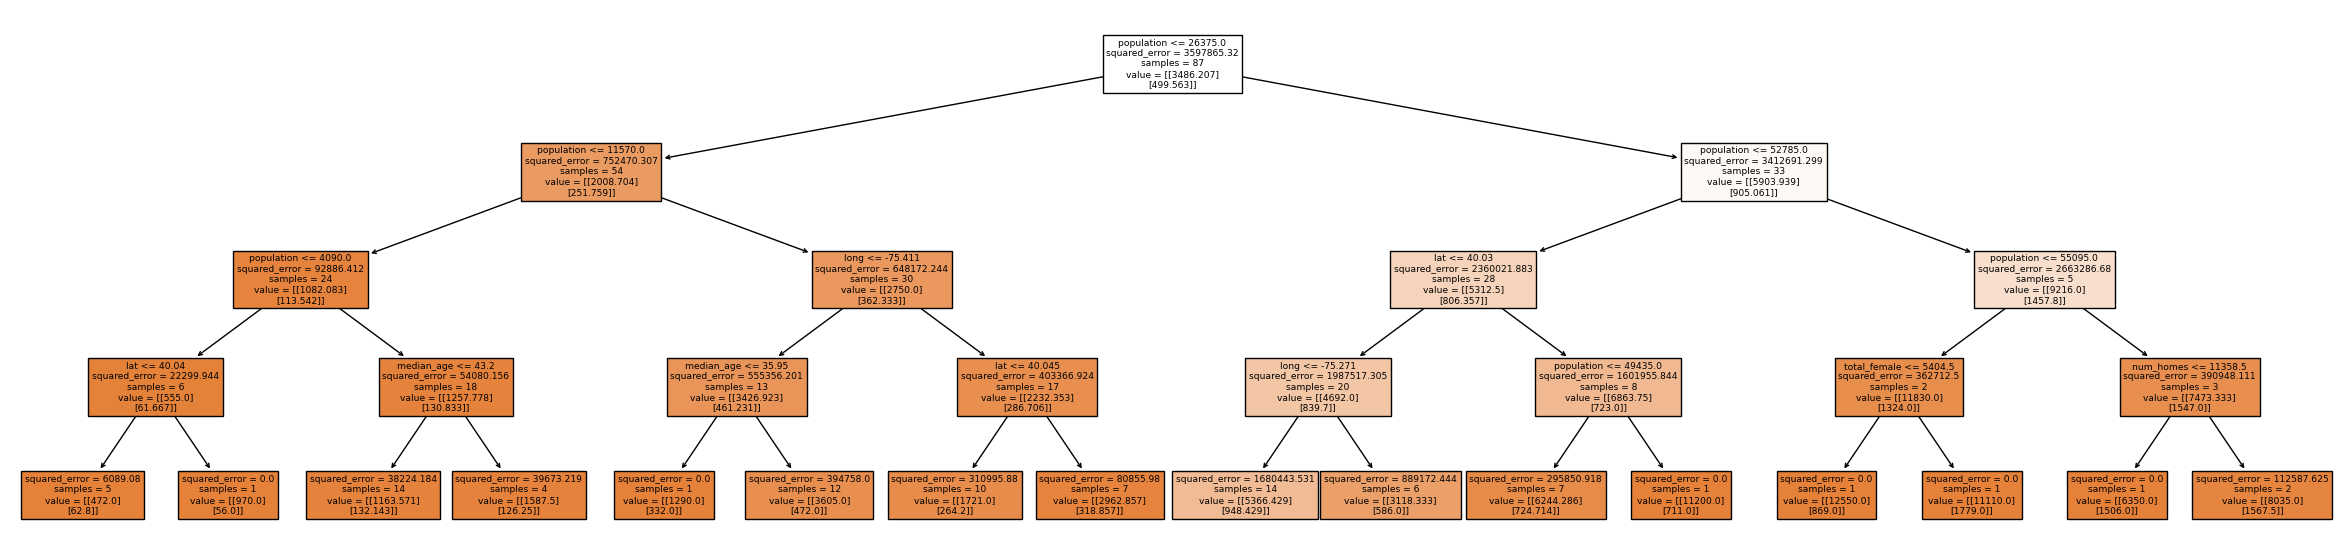

In [25]:
big_pruned_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['population',  'income', 'lat', 'long',
                                                    'total_pop', 'total_male', 'total_female',
                                                    'sex_ratio', 'median_age','num_homes', 'total_voters']],
                                            gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(30, 7))
plot_tree(big_pruned_tree, filled=True, feature_names=['population',  'income', 'lat', 'long',
                                                    'total_pop', 'total_male', 'total_female',
                                                    'sex_ratio', 'median_age','num_homes', 'total_voters']) # type: ignore
plt.show()

Lots of difference on population, slightly less on long/lat, an average amount on median age, & a smaller amount on other categories, so the next steps are to work on those

## Population

Because population/num homes with respect to zip code is nonsensical to an extent, lets create an average number of people per home metric

In [26]:
gaydf2['avg_people_per_home'] = gaydf2['population'] / gaydf2['num_homes']

gaydf2.head(15)

,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,Zip,total_pop,total_male,total_female,sex_ratio,median_age,num_homes,total_voters,avg_people_per_home
0,10001,19710.0,2540,766.0,1,40.750633,-73.997177,2540.0,766.0,10001,180078,87135,92943,93.8,38.2,72211,134489,0.272950
1,10003,39470.0,5550,1569.0,1,40.731829,-73.989181,5550.0,1569.0,10003,567769,276369,291400,94.8,38.8,232162,416771,0.170011
2,10005,8600.0,1370,265.0,1,40.706027,-74.008835,1370.0,265.0,10005,234045,113715,120330,94.5,50.7,140731,182526,0.061109
3,11001,26970.0,5780,394.0,1,40.723317,-73.704949,5780.0,394.0,11001,683154,325490,357664,91.0,34.3,344306,512337,0.078331
4,19001,16520.0,3370,176.0,1,40.125912,-75.125442,3370.0,176.0,19001,7439,3762,3677,102.3,43.4,3591,5721,4.600390
5,19003,11990.0,2370,220.0,1,40.001553,-75.298929,2370.0,220.0,19003,3697,1833,1864,98.3,46.7,1894,2899,6.330517
6,19007,19250.0,2880,317.0,1,40.113179,-74.857650,2880.0,317.0,19007,12310,6076,6234,97.5,44.9,6337,9429,3.037715
7,19013,25530.0,1170,194.0,1,39.848281,-75.377981,1170.0,194.0,19013,131396,64875,66521,97.5,35.6,58378,98225,0.437322
8,19015,14940.0,2410,160.0,1,39.868633,-75.392945,2410.0,160.0,19015,26721,13617,13104,103.9,42.2,11911,20763,1.254303
9,19021,9200.0,1620,146.0,1,40.089651,-74.892183,1620.0,146.0,19021,20723,10923,9800,111.5,35.2,8173,12820,1.125658


In [27]:
gaydf2.describe()['avg_people_per_home']

count    87.000000
mean      4.472319
std       7.375968
min       0.050508
25%       0.660468
50%       2.586705
75%       5.668643
max      53.173653
Name: avg_people_per_home, dtype: float64

Nonsensical figures right there, but since we're doing Regression this should technically work as regression is just looking for patterns & correlations - the CART algorithm isn't disrupted by this (in other words, CART is invariant to a non localized variable)

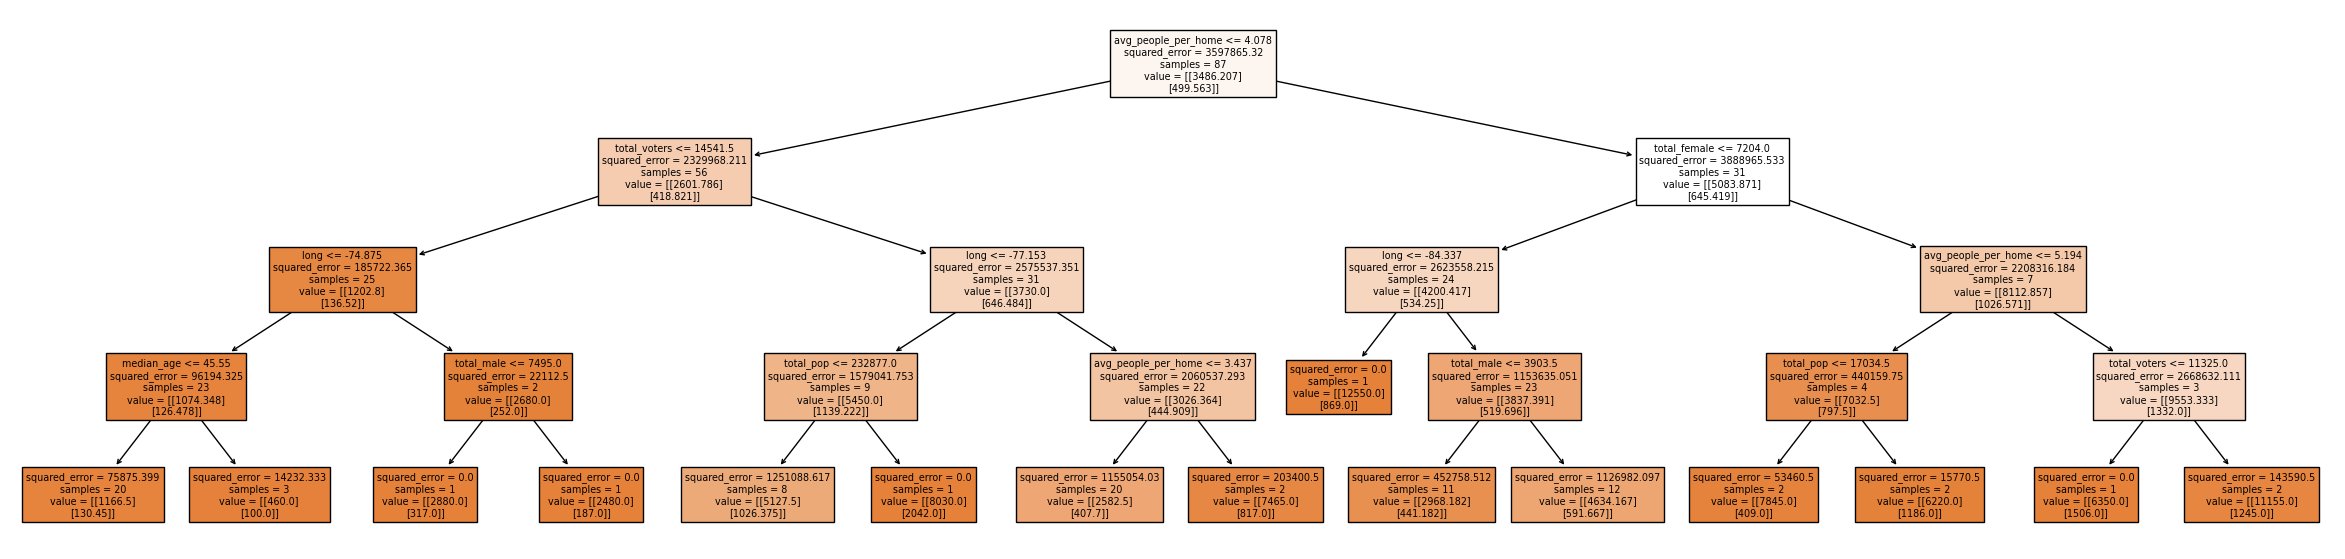

In [28]:
APPH_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['avg_people_per_home',  'income', 'lat', 'long',
                                                        'total_pop', 'total_male', 'total_female',
                                                        'sex_ratio', 'median_age', 'total_voters']],
                                                gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(30, 7))
plot_tree(APPH_tree, filled=True, feature_names=['avg_people_per_home',  'income', 'lat', 'long',
                                                        'total_pop', 'total_male', 'total_female',
                                                        'sex_ratio', 'median_age', 'total_voters']) # type: ignore
plt.show()

Looking a lot better, now lets unify the gender parameter & remove the total pop metric - neither should be useful here

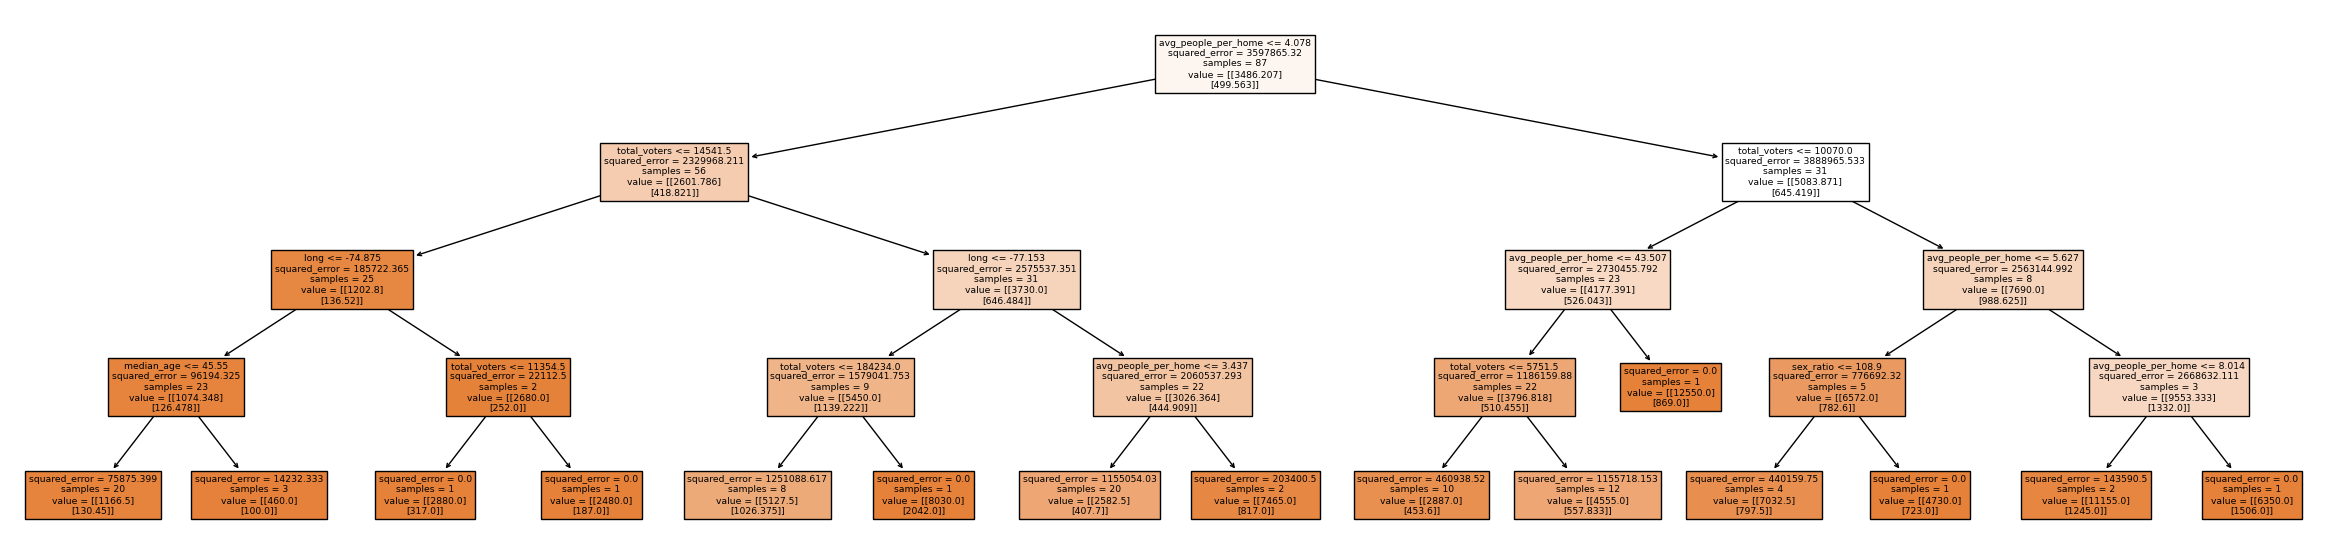

In [29]:
APPH_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['avg_people_per_home',  'income', 'lat', 'long',
                                                        'sex_ratio', 'median_age', 'total_voters']],
                                                gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(30, 7))
plot_tree(APPH_tree, filled=True, feature_names=['avg_people_per_home',  'income', 'lat', 'long',
                                                        'sex_ratio', 'median_age', 'total_voters']) # type: ignore
plt.show()

## Sex Ratio

Now lets do the same, but with age. Lets remove the bigger parameters (population, && long & lat) to isolate for the good stuff

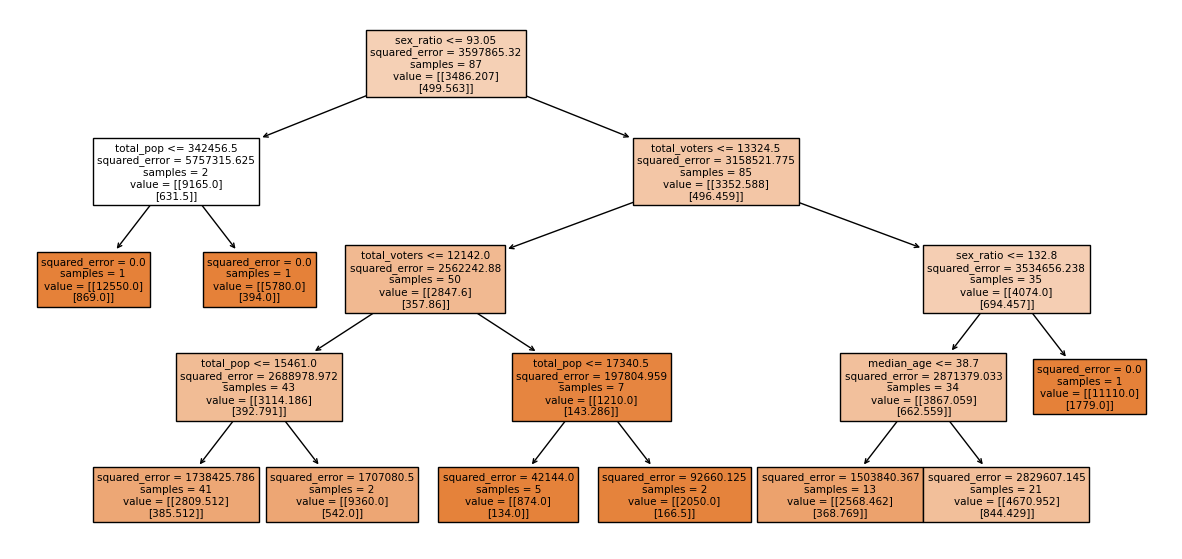

In [30]:
sex_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['income', 'total_pop',
                                                'sex_ratio', 'median_age','num_homes', 'total_voters']],
                                            gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(15, 7))
plot_tree(sex_tree, filled=True, feature_names=['income', 'total_pop',
                                                'sex_ratio', 'median_age','num_homes', 'total_voters']) # type: ignore
plt.show()

I have a thought, but lets remove more variables to confirm it

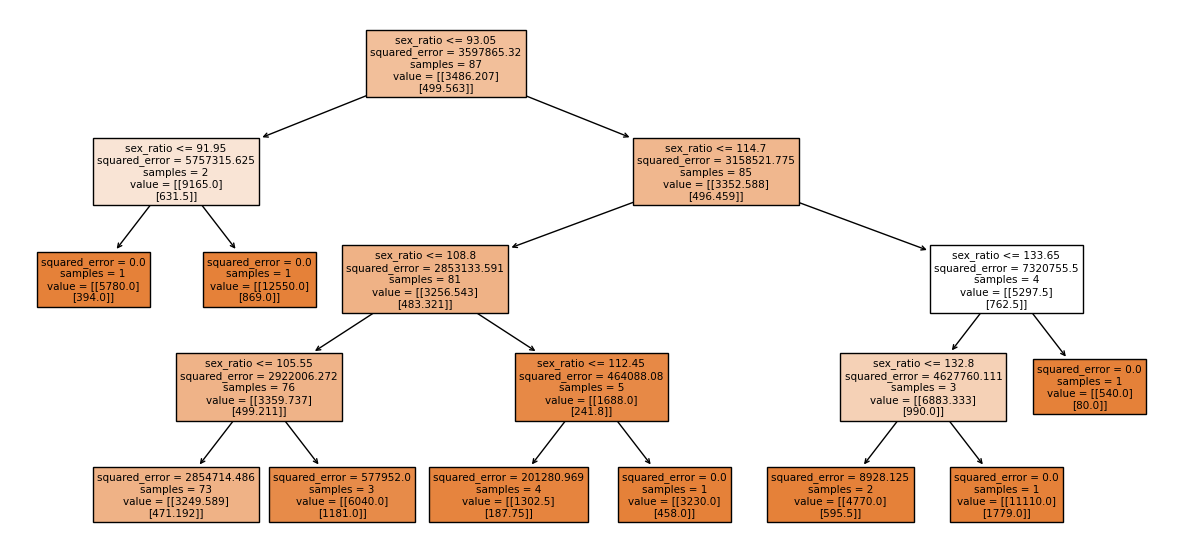

In [31]:
sex_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['income', 'sex_ratio']],
                                        gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(15, 7))
plot_tree(sex_tree, filled=True, feature_names=['income', 'sex_ratio']) # type: ignore
plt.show()

Same Male/Female diff we noticed in the linear regression from earlier - warrents more investigation

## Median age

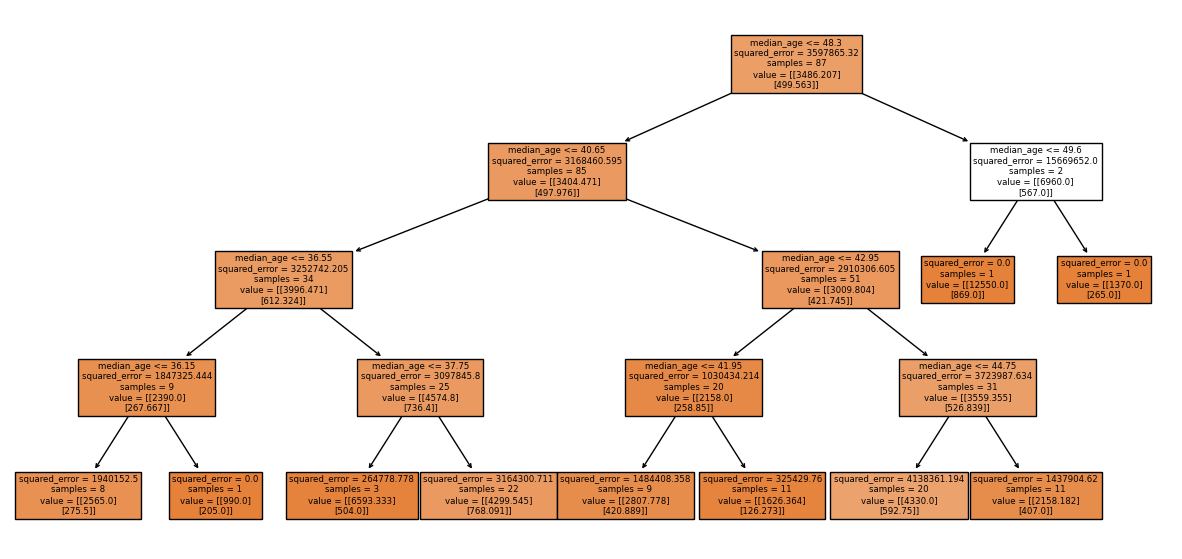

In [32]:
age_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['income', 'median_age']],
                                            gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(15, 7))
plot_tree(age_tree, filled=True, feature_names=['income', 'median_age']) # type: ignore
plt.show()

MSE in the millions for the lot of these, & the boundaries look like splitting hairs, so looks like nothing significant

## Long/Lat

Lets see if the geolocational data can help us here

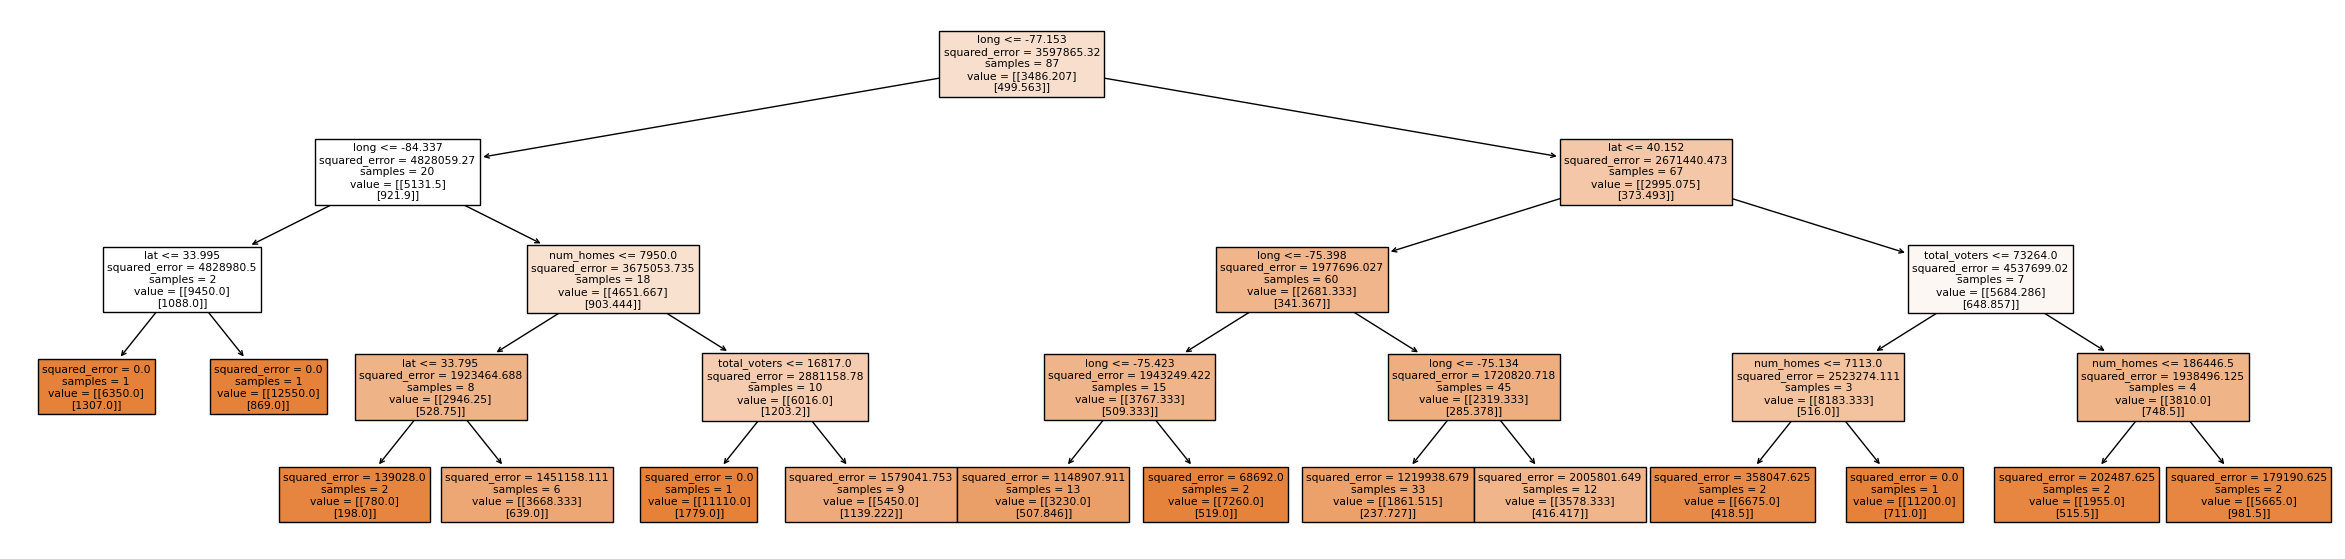

In [33]:
geo_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['income', 'lat', 'long', 'num_homes', 'total_voters']],
                                                gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(30, 7))
plot_tree(geo_tree, filled=True, feature_names=['income', 'lat', 'long', 'num_homes', 'total_voters']) # type: ignore
plt.show()

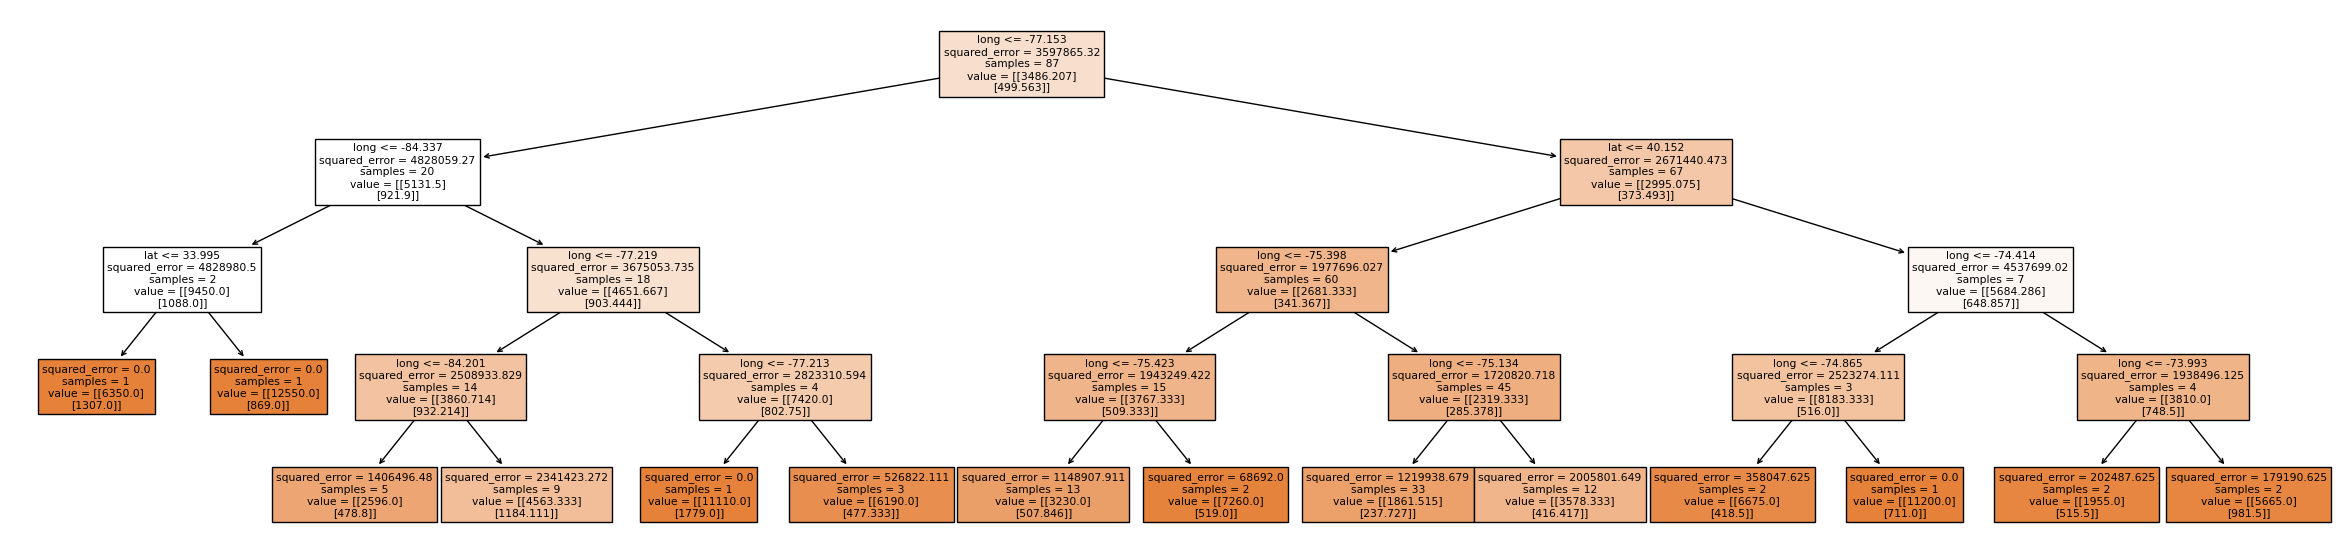

In [34]:
geo_tree = DecisionTreeRegressor(max_depth=4).fit( gaydf2[['income', 'lat', 'long']],
                                                gaydf2[['gay_tax_rate', 'overall_tax_paid',]])

plt.figure(figsize=(30, 7))
plot_tree(geo_tree, filled=True, feature_names=['income', 'lat', 'long']) # type: ignore
plt.show()

The solution here is to try using clustering to split everything into a bunch of cities, & work from there - We're going to use KNN but any clustering algorithm would work here

In [35]:
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [36]:
# knn = KNeighborsClassifier(n_neighbors=5).fit(x, gaydf2[['gay_tax_rate', 'overall_tax_paid',]], ) # mistakenly implemented supervised ML stuff

gaydfmap = pd.DataFrame(gaydf)

kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(gaydfmap[['lat', 'long',]])

gaydfmap['cluster'] = kmeans.labels_ + 1; gaydfmap.head(10)

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,cluster
0,1730,13570.0,3260,150.0,1,42.499295,-71.281889,3260.0,150.0,11
1,1731,2450.0,550,0.0,1,42.456748,-71.279484,550.0,0.0,11
2,1742,17170.0,4220,297.0,1,42.462911,-71.364496,4220.0,297.0,11
3,1760,34350.0,7880,468.0,1,42.284822,-71.348811,7880.0,468.0,11
4,1770,4310.0,1060,46.0,1,42.231947,-71.372963,1060.0,46.0,11
5,1773,5340.0,1400,78.0,1,42.425506,-71.310812,1400.0,78.0,11
6,1778,13910.0,3460,199.0,1,42.343687,-71.381186,3460.0,199.0,11
7,1801,37270.0,7630,711.0,1,42.488769,-71.154438,7630.0,711.0,11
8,1803,24740.0,5820,283.0,1,42.503227,-71.201713,5820.0,283.0,11
9,1867,24810.0,5960,272.0,1,42.535183,-71.105423,5960.0,272.0,11


Now lets print

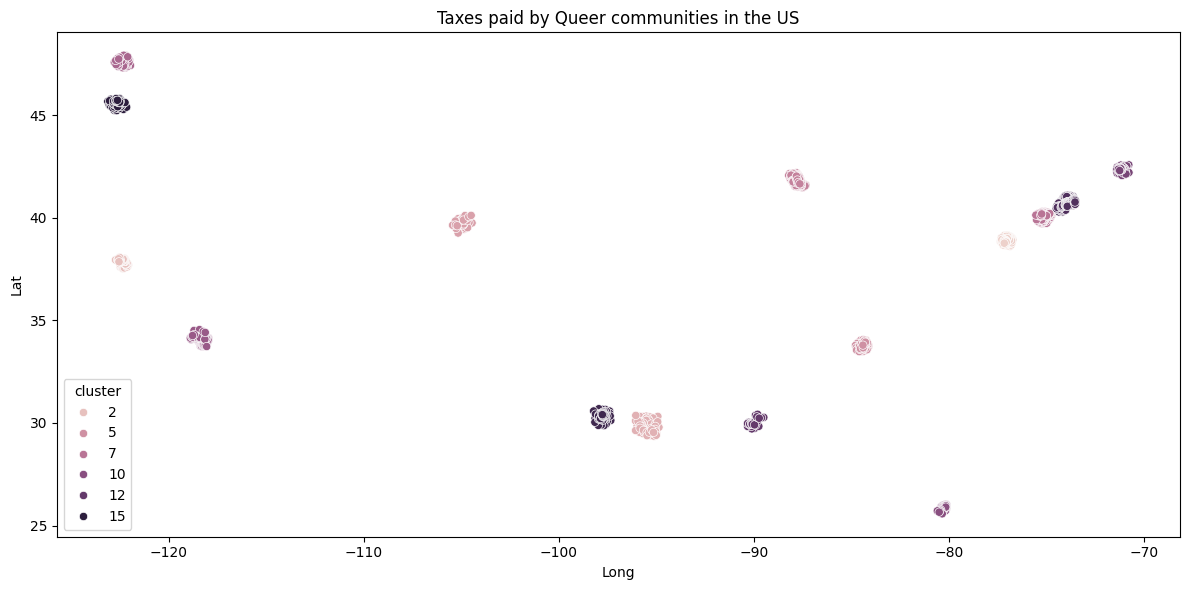

In [37]:
plt.figure(figsize=(12, 6))
plot1 = sns.scatterplot(data=gaydfmap, x="long", y="lat", hue='cluster')
_ = plot1.set(xlabel="Long", ylabel="Lat", title="Taxes paid by Queer communities in the US")
plt.tight_layout();     plt.show()

Now that we have the cities labeled, lets try the geo locational thing again

First lets split it into a set of letters so the model can process it categorically & not discretely numerically

In [38]:
mapmap = {i: chr(97 + i) for i in range(15)}  # #97 is for ascii shenanigans
gaydfmap['cluster_letter'] = gaydfmap['cluster'].map(mapmap); gaydfmap.head(10)

,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,cluster,cluster_letter
0,1730,13570.0,3260,150.0,1,42.499295,-71.281889,3260.0,150.0,11,l
1,1731,2450.0,550,0.0,1,42.456748,-71.279484,550.0,0.0,11,l
2,1742,17170.0,4220,297.0,1,42.462911,-71.364496,4220.0,297.0,11,l
3,1760,34350.0,7880,468.0,1,42.284822,-71.348811,7880.0,468.0,11,l
4,1770,4310.0,1060,46.0,1,42.231947,-71.372963,1060.0,46.0,11,l
5,1773,5340.0,1400,78.0,1,42.425506,-71.310812,1400.0,78.0,11,l
6,1778,13910.0,3460,199.0,1,42.343687,-71.381186,3460.0,199.0,11,l
7,1801,37270.0,7630,711.0,1,42.488769,-71.154438,7630.0,711.0,11,l
8,1803,24740.0,5820,283.0,1,42.503227,-71.201713,5820.0,283.0,11,l
9,1867,24810.0,5960,272.0,1,42.535183,-71.105423,5960.0,272.0,11,l


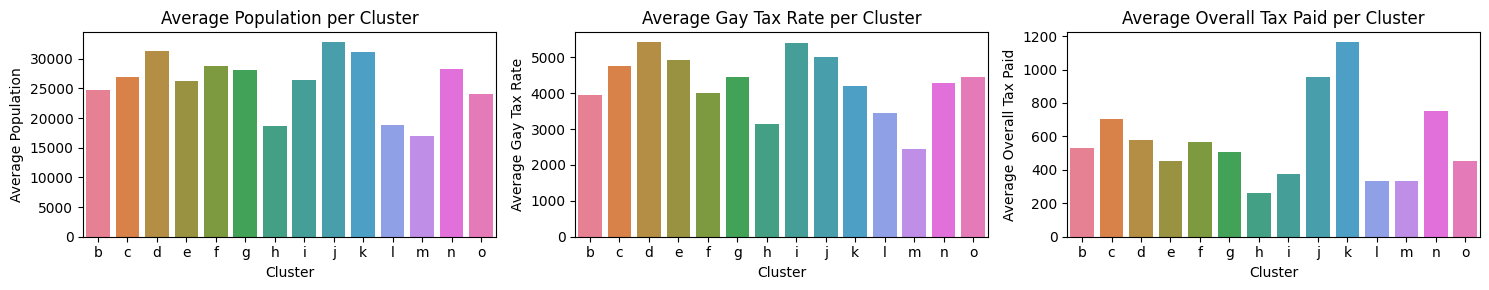

In [39]:
# city_geo_tree = DecisionTreeRegressor(max_depth=4).fit( gaydfmap[['income', 'cluster']],
#                                                 gaydfmap[['gay_tax_rate', 'overall_tax_paid',]])
# plt.figure(figsize=(30, 7))
# plot_tree(city_geo_tree, filled=True, feature_names=['income', 'cluster']) # type: ignore
# plt.show()

average_values = gaydfmap.groupby('cluster_letter').agg({
    'population': 'mean',
    'gay_tax_rate': 'mean',
    'overall_tax_paid': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

sns.barplot(data=average_values, x='cluster_letter', y='population', hue='cluster_letter', ax=axes[0])
axes[0].set_title('Average Population per Cluster')
axes[0].set_ylabel('Average Population')
axes[0].set_xlabel('Cluster')

sns.barplot(data=average_values, x='cluster_letter', y='gay_tax_rate', hue='cluster_letter', ax=axes[1])
axes[1].set_title('Average Gay Tax Rate per Cluster')
axes[1].set_ylabel('Average Gay Tax Rate')
axes[1].set_xlabel('Cluster')

sns.barplot(data=average_values, x='cluster_letter', y='overall_tax_paid', hue='cluster_letter', ax=axes[2])
axes[2].set_title('Average Overall Tax Paid per Cluster')
axes[2].set_ylabel('Average Overall Tax Paid')
axes[2].set_xlabel('Cluster')

plt.tight_layout()
plt.show()

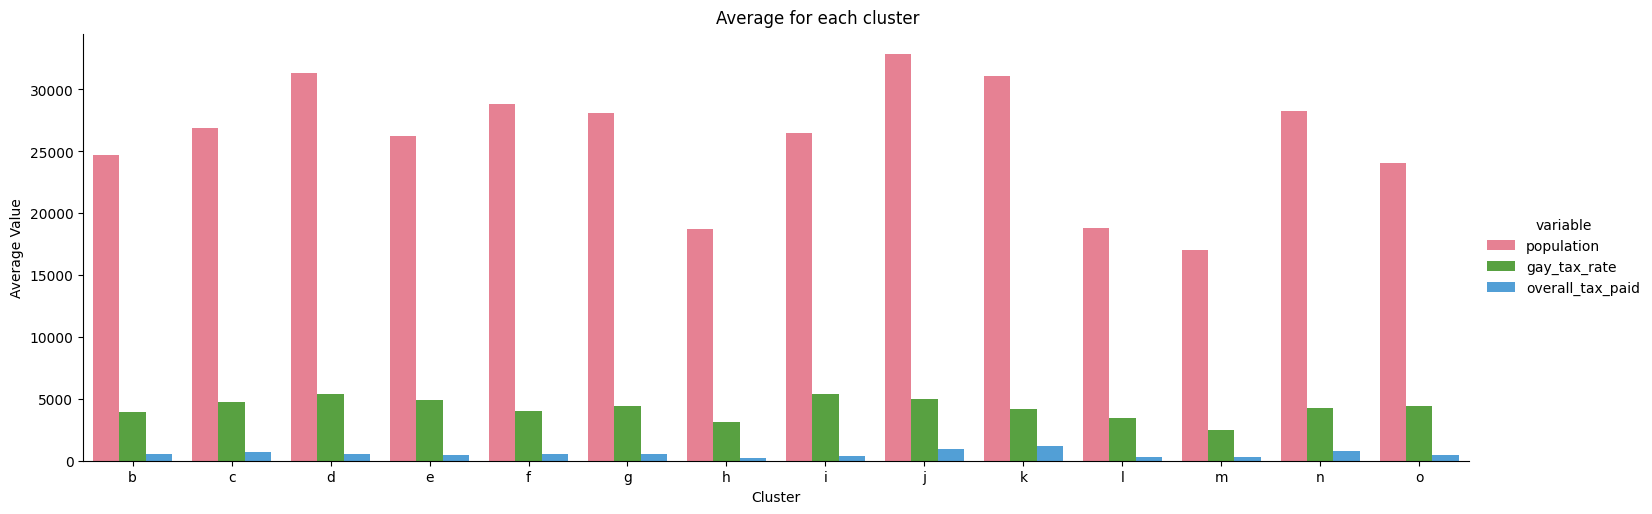

In [40]:
meltdf = average_values.melt(id_vars='cluster_letter', var_name='variable', value_name='value')


g = sns.catplot(
    data=meltdf, kind="bar",
    x="cluster_letter", y="value", hue="variable",
    errorbar="sd", palette="husl", aspect=3, height=5
)

g.set_axis_labels("Cluster", "Average Value")
g.fig.suptitle("Average for each cluster", y=1.02)
plt.show()

Looks like the difference between queer & cis/het samples could be bigger or smaller for different cities, time for a linear regression again

In [41]:
import statsmodels.api as sm

X = gaydfmap.drop(columns=['lat', 'long', 'population', 'gay_tax_rate', 'overall_tax_paid', 'cluster'])
y_population = gaydfmap['population']
y_gay_tax_rate = gaydfmap['gay_tax_rate']
y_overall_tax_paid = gaydfmap['overall_tax_paid']

# X = smf.add_constant(X)
model_gay_tax_rate = smf.ols(formula='gay_tax_rate ~ C(cluster) + population', data=gaydfmap).fit()
model_overall_tax_paid = smf.ols(formula='overall_tax_paid ~ C(cluster) + population', data=gaydfmap).fit()

# print("Population:")
# print(model_population.summary())
# formula='gay_tax_rate ~ overall_tax_paid + total_male + total_female + sex_ratio', data=gaydf2).fit()


In [42]:
print("Gaytax:")
print(model_gay_tax_rate.params)

Gaytax:
Intercept            366.706512
C(cluster)[T.2]      510.991813
C(cluster)[T.3]      529.938734
C(cluster)[T.4]      763.907055
C(cluster)[T.5]     -526.487732
C(cluster)[T.6]       19.065223
C(cluster)[T.7]       83.582968
C(cluster)[T.8]     1199.960575
C(cluster)[T.9]      -98.905461
C(cluster)[T.10]    -663.196498
C(cluster)[T.11]     349.771778
C(cluster)[T.12]    -381.872918
C(cluster)[T.13]    -159.399579
C(cluster)[T.14]     600.440411
C(cluster)[T.15]     936.000986
population             0.144871
dtype: float64


In [43]:
print("gentax:")
print(model_overall_tax_paid.params)

gentax:
Intercept           -63.735809
C(cluster)[T.2]     122.557967
C(cluster)[T.3]    -109.731935
C(cluster)[T.4]    -115.459423
C(cluster)[T.5]     -61.870055
C(cluster)[T.6]    -106.622254
C(cluster)[T.7]    -125.182859
C(cluster)[T.8]    -199.965738
C(cluster)[T.9]     231.843481
C(cluster)[T.10]    480.383355
C(cluster)[T.11]    -55.938539
C(cluster)[T.12]    -12.914646
C(cluster)[T.13]    137.942254
C(cluster)[T.14]    -60.326729
C(cluster)[T.15]   -134.413262
population            0.024043
dtype: float64


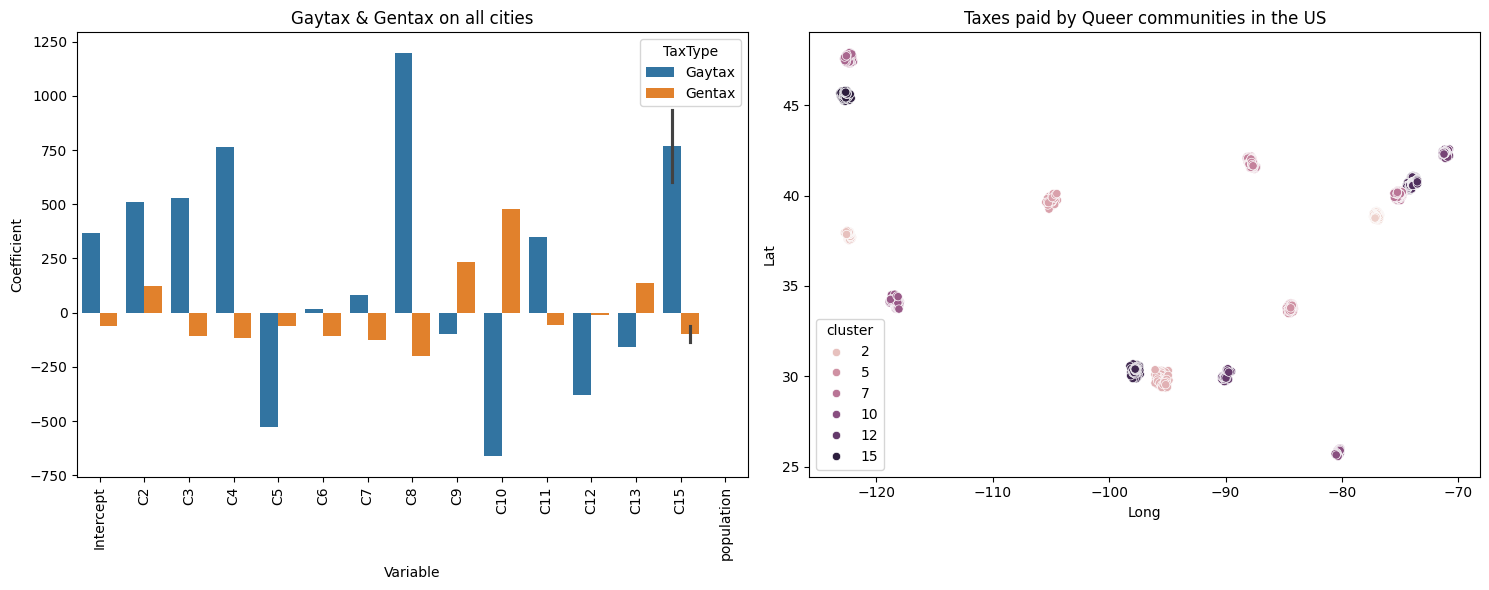

In [44]:
data = {
    'Variable': ['Intercept', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C15', 'C15', 'population'],
    'Gaytax': model_gay_tax_rate.params,
    'Gentax': model_overall_tax_paid.params
}

regdf = pd.DataFrame(data)

regdf = regdf.melt(id_vars='Variable', var_name='TaxType', value_name='Coefficient')

# sns.catplot(x='Variable', y='Coefficient', hue='TaxType', data=regdf, kind='bar', height=6, aspect=2, ax=axes[0])
# axes[0].title('Gaytax & Gentax on all cities') # axes[0].xticks(rotation=90); 

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#lin reg
sns.barplot(x='Variable', y='Coefficient', hue='TaxType', data=regdf, ax=axes[0])
axes[0].set_title('Gaytax & Gentax on all cities')
axes[0].tick_params(axis='x', rotation=90)

#gaydfmap
sns.scatterplot(data=gaydfmap, x="long", y="lat", hue='cluster', ax=axes[1])
axes[1].set_xlabel("Long")
axes[1].set_ylabel("Lat")
axes[1].set_title("Taxes paid by Queer communities in the US")

plt.tight_layout()
plt.show()


At last, we have confirmation of a correlation - some cities pay more & less tax of course, but some affect queer communities differently in & of themselves

for example, city 10 has been really mean to queer couples, but very generous to cis/et - meanwhile city 8 has been the complete opposite

## putting it all together

First looking at my old conclusions:

    "as we can infer by taking the first derivative of the corelation line of this graph, queer communities pay significantly more taxes then typical neighborhoods"

    "an explanation for this is queer people through one mechanism or another (queer folk being more likely to be politically progressive, live in cities, or get educations for example) end up corelating strongly with demographics who pay more tax"

    "due note that the analysis is severely limited by severe sampling bias as only hyper urban geographical stratum have been surveyed by gayborhoods"

The first thing that pops up to me is the first conclusion - while the original conclusion was wildly flawed due to the 2 tax rates measuring 2 different things - The current model can easily measure the differences between the 2 groups by showing not a ratio of the 2, but rather by measuring deviations in the dataset between cities

Hence I conclude: the biggest inequity in the entire domain is not between queer & general populations, but rather amongst different cities or regions showing a wide spectrum of biases for & against the LGBT population (in terms of their tax rates) - although this is also likely to be the case in tandem with queers overlapping with other demographics (young, working class, urban, etc etc)

On top of this, this conclusion is not as limited by the sample bias or the data set existing in cities - as the current conclusion concludes precisely that there is a measured difference between cities that at the very least exists within the confidence range of a conclusion

And on a final note, I don't seem to have anything strong enough to conclude a difference between genders, so I will fall back to the null hypothesis there in order for another dataset to be studied someday to better do the gender wage gap justice

But besides that, its time to compile a quick dashboard for all my graphs

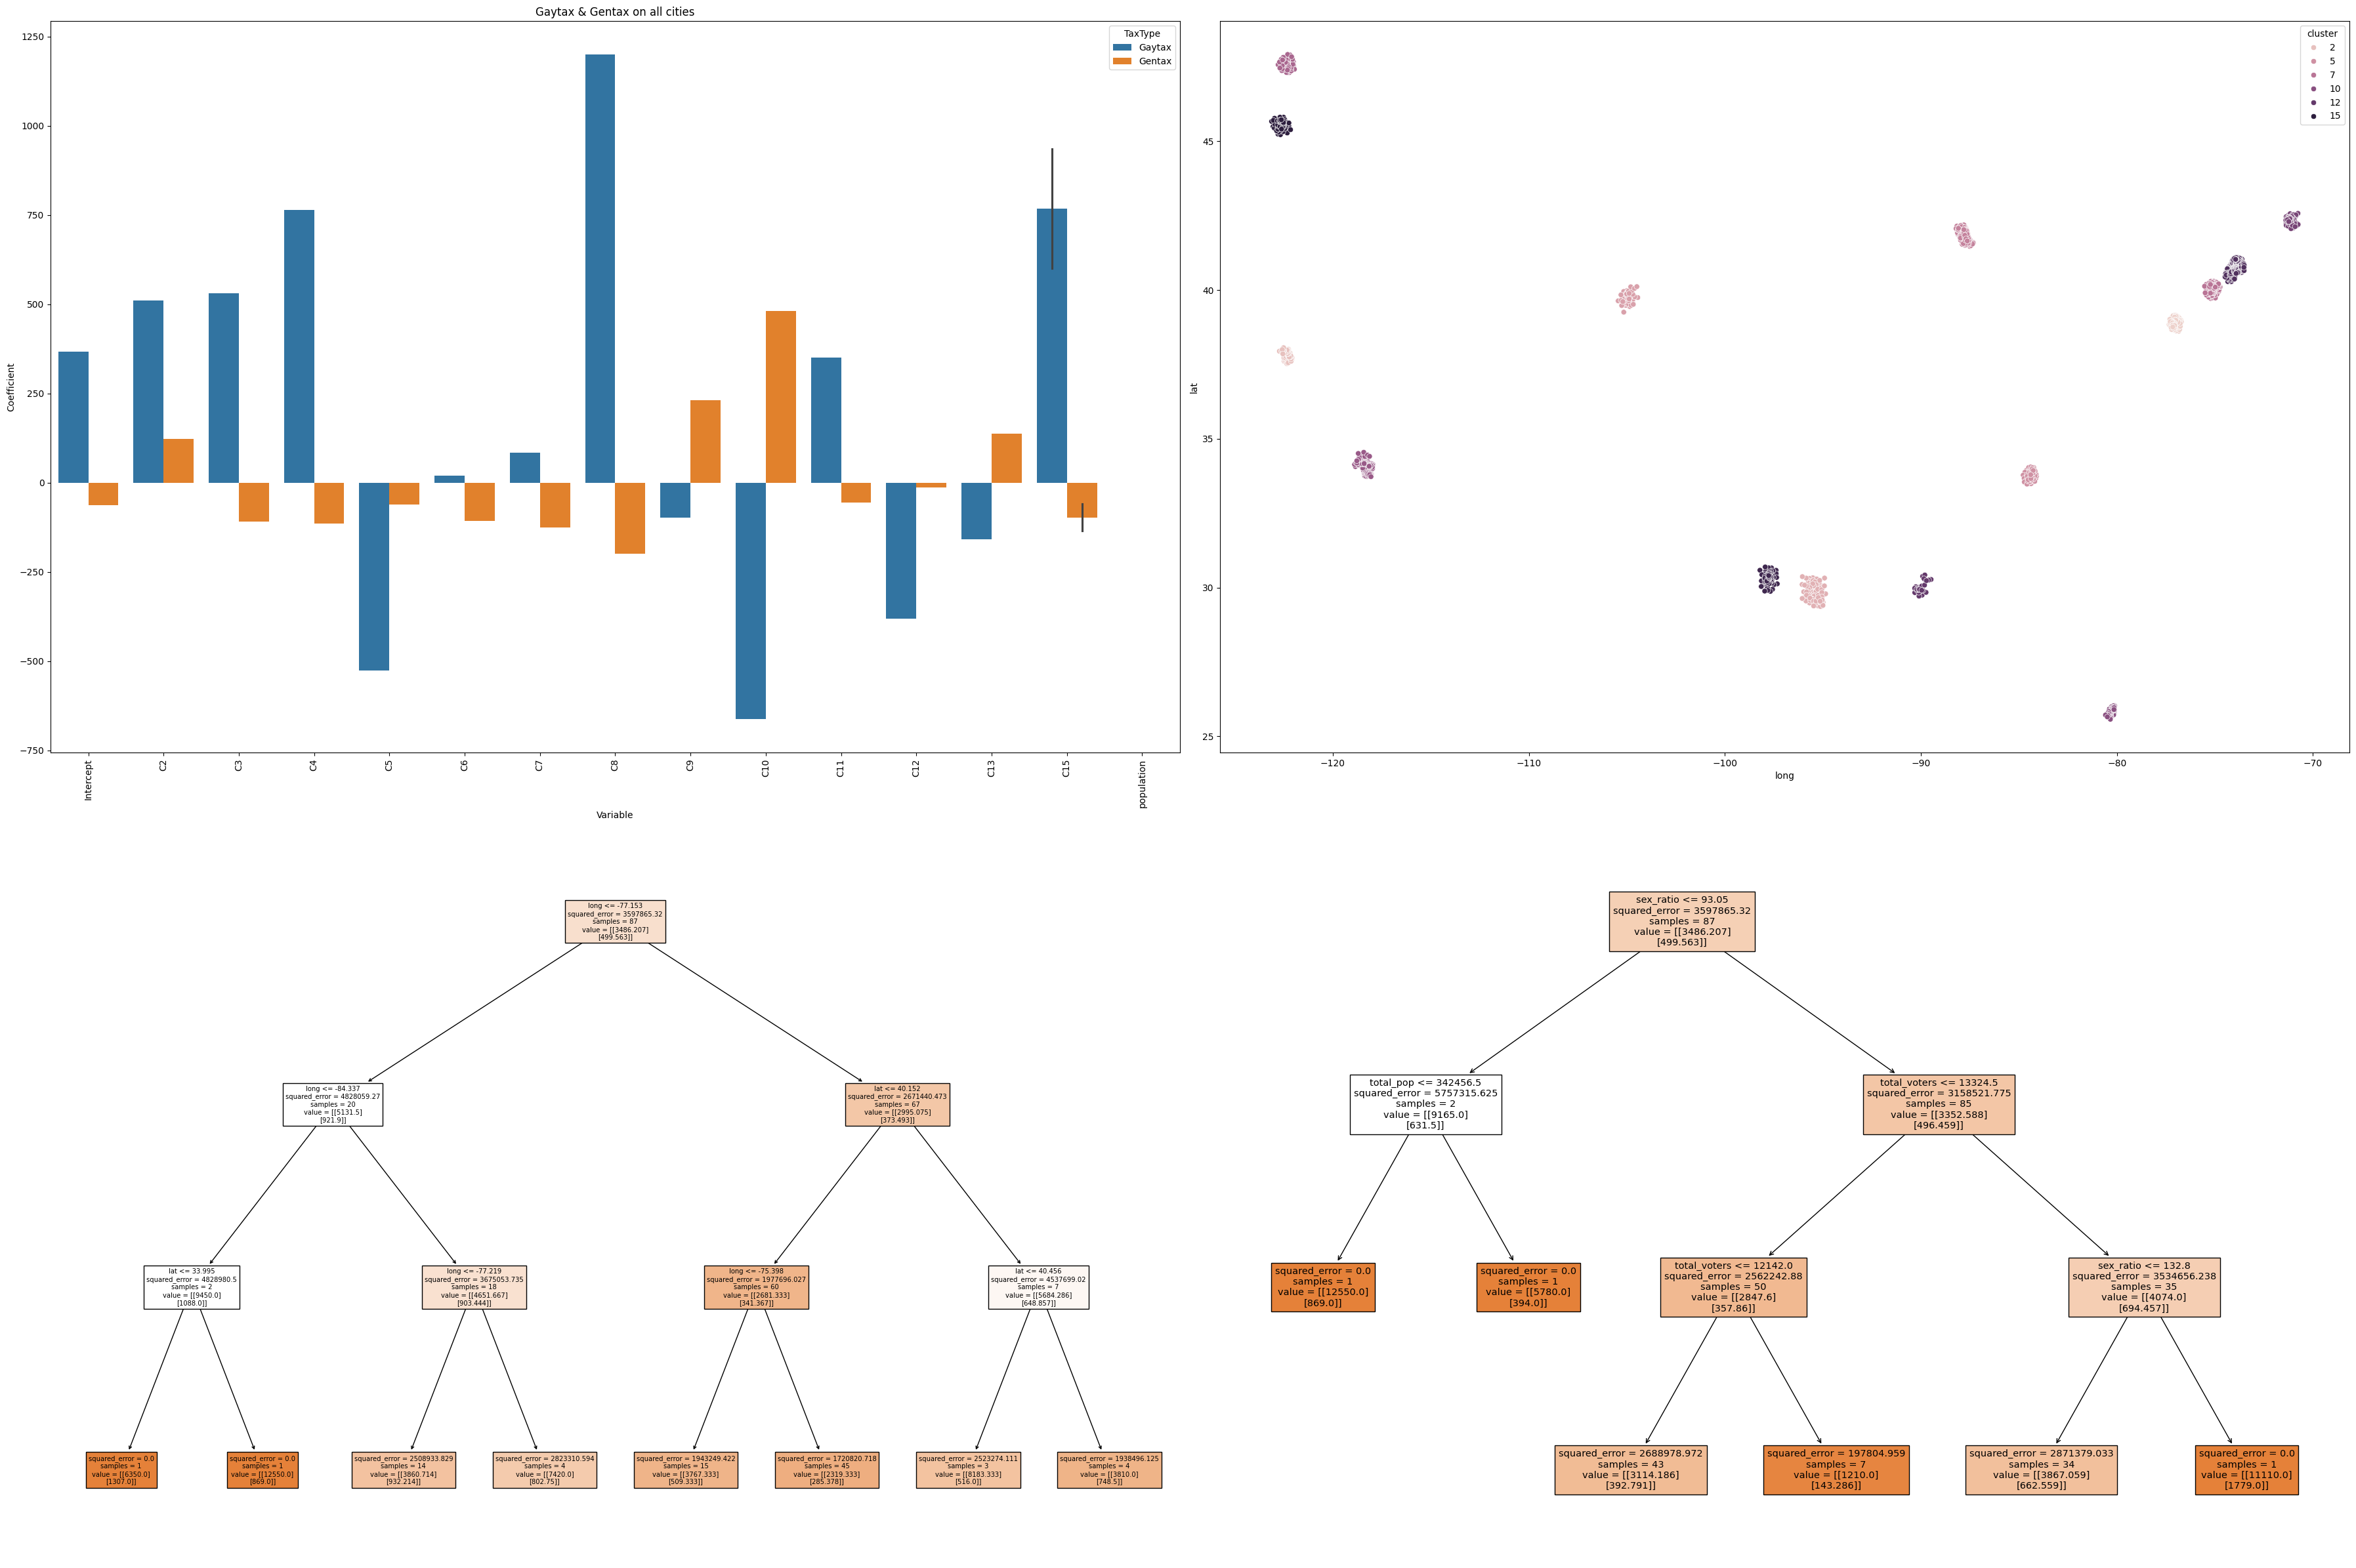

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(36, 24))

#lin reg
sns.barplot(x='Variable', y='Coefficient', hue='TaxType', data=regdf, ax=axes[0, 0])
axes[0, 0].set_title('Gaytax & Gentax on all cities')
axes[0, 0].tick_params(axis='x', rotation=90)

#gaydfmap
sns.scatterplot(data=gaydfmap, x="long", y="lat", hue='cluster', ax=axes[0, 1])
axes[1, 0].set_xlabel("Long")
axes[1, 0].set_ylabel("Lat")
axes[1, 0].set_title("Taxes paid by Queer communities in the US")

#geotree
geo_tree = DecisionTreeRegressor(max_depth=3).fit( gaydf2[['income', 'lat', 'long']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]] )
plot_tree(geo_tree, filled=True, feature_names=['income', 'lat', 'long'], ax=axes[1, 0]) # type: ignore

#snextree
sex_tree = DecisionTreeRegressor(max_depth=3).fit( gaydf2[['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]])
# plt.figure(figsize=(15, 7))
plot_tree(sex_tree, filled=True, feature_names=['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters'], ax=axes[1, 1]) # type: ignore

plt.tight_layout()
plt.show()


Lets label the cities

In [46]:
one_coord_per_cluster = gaydfmap.groupby('cluster').first().reset_index(); print(one_coord_per_cluster[['cluster', 'lat', 'long']])

    cluster        lat        long
0         1  38.910353  -77.017739
1         2  37.688826 -122.408935
2         3  29.756845  -95.365652
3         4  39.794822 -105.105292
4         5  33.773335  -84.261667
5         6  41.465084  -87.508915
6         7  39.931978  -75.027557
7         8  47.310617 -122.263291
8         9  33.974027 -118.249509
9        10  25.985129  -80.147261
10       11  42.499295  -71.281889
11       12  30.271308  -89.481756
12       13  41.037605  -73.624339
13       14  30.579327  -97.388622
14       15  45.240483 -122.793841


In [47]:
random_words = [
    'Washington', 'San Francisco', 'Houston', 
    'Denver', 'Atlanta', 'Chicago',
    'Philadelphia', 'Seattle', 'Los Angeles',
    'Miami', 'Boston', 'New Orleans',
    'New York', 'Austin', 'Portland'
]

# cluster_names = [f'{i+1}' for i in range(len(random_words))]
# cluster_mapping = dict(zip(cluster_names, random_words))

# print(f"Cluster Mapping: {cluster_mapping}")



cluster_mapping = {i + 1: word for i, word in enumerate(random_words)}
# cluster_mapping = dict(zip(cluster_names, random_words))

gaydfmap['city'] = gaydfmap['cluster'].map(cluster_mapping)


In [48]:
gaydfmap

,zip,population,gay_tax_rate,overall_tax_paid,income,lat,long,gaytax per income,overalltax per income,cluster,cluster_letter,city
0,1730,13570.0,3260,150.0,1,42.499295,-71.281889,3260.0,150.0,11,l,Boston
1,1731,2450.0,550,0.0,1,42.456748,-71.279484,550.0,0.0,11,l,Boston
2,1742,17170.0,4220,297.0,1,42.462911,-71.364496,4220.0,297.0,11,l,Boston
3,1760,34350.0,7880,468.0,1,42.284822,-71.348811,7880.0,468.0,11,l,Boston
4,1770,4310.0,1060,46.0,1,42.231947,-71.372963,1060.0,46.0,11,l,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...
2179,98682,57010.0,11080,703.0,1,45.673209,-122.481745,11080.0,703.0,15,NaN,Portland
2180,98683,30700.0,6470,358.0,1,45.603287,-122.510170,6470.0,358.0,15,NaN,Portland
2181,98684,27630.0,5390,371.0,1,45.630556,-122.514839,5390.0,371.0,15,NaN,Portland
2182,98685,27540.0,6490,298.0,1,45.715211,-122.693165,6490.0,298.0,15,NaN,Portland


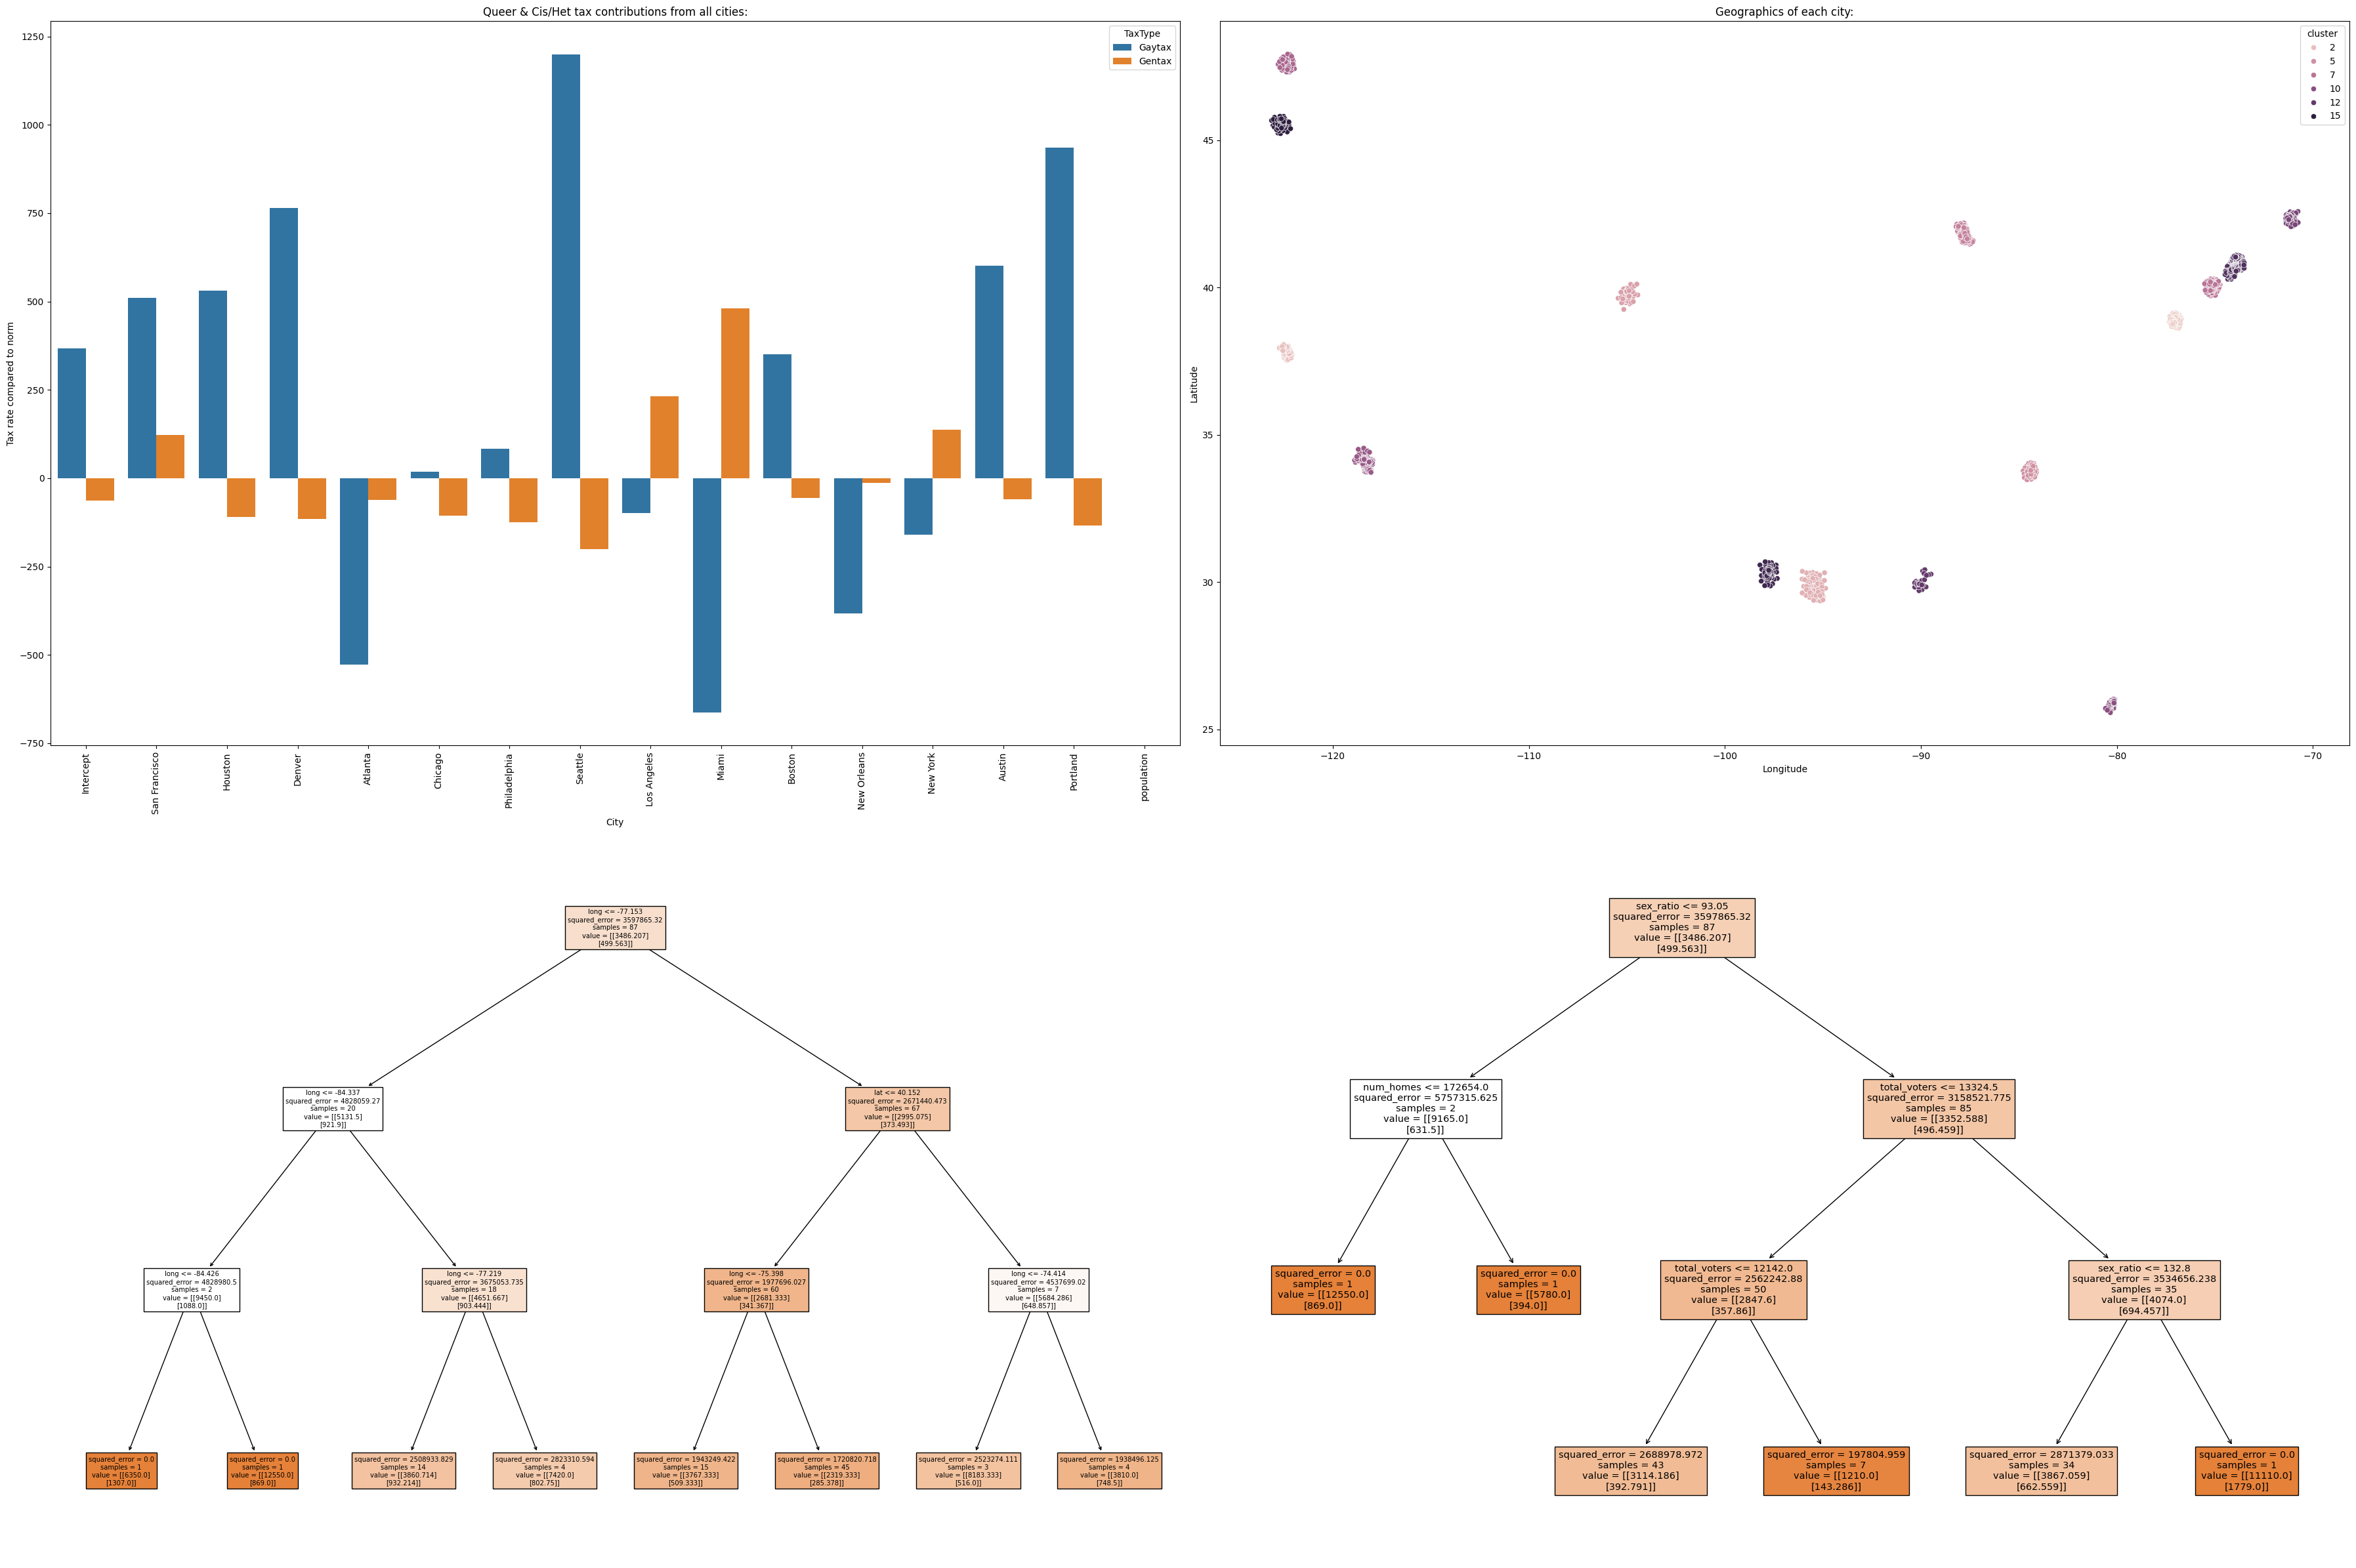

In [49]:
data = {
    'Variable': ['Intercept', 'San Francisco', 'Houston', 
    'Denver', 'Atlanta', 'Chicago',
    'Philadelphia', 'Seattle', 'Los Angeles',
    'Miami', 'Boston', 'New Orleans',
    'New York', 'Austin', 'Portland', 'population'],
    'Gaytax': model_gay_tax_rate.params,
    'Gentax': model_overall_tax_paid.params
}

regdf = pd.DataFrame(data)

regdf = regdf.melt(id_vars='Variable', var_name='TaxType', value_name='Coefficient')


fig, axes = plt.subplots(2, 2, figsize=(36, 24))

#lin reg
sns.barplot(x='Variable', y='Coefficient', hue='TaxType', data=regdf, ax=axes[0, 0])
axes[0, 0].set_title('Queer & Cis/Het tax contributions from all cities:')
axes[0, 0].set_xlabel("City"); axes[0, 0].set_ylabel("Tax rate compared to norm")
axes[0, 0].tick_params(axis='x', rotation=90)

#gaydfmap
sns.scatterplot(data=gaydfmap, x="long", y="lat", hue='cluster', ax=axes[0, 1])
axes[0, 1].set_xlabel("Longitude"); axes[0, 1].set_ylabel("Latitude")
axes[0, 1].set_title("Geographics of each city:")

#geotree
geo_tree = DecisionTreeRegressor(max_depth=3).fit( gaydf2[['income', 'lat', 'long']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]] )
plot_tree(geo_tree, filled=True, feature_names=['income', 'lat', 'long'], ax=axes[1, 0]) # type: ignore

#snextree
sex_tree = DecisionTreeRegressor(max_depth=3).fit( gaydf2[['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]])
# plt.figure(figsize=(15, 7))
plot_tree(sex_tree, filled=True, feature_names=['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters'], ax=axes[1, 1]) # type: ignore

plt.tight_layout(); plt.savefig('dashboard/queer_tax_analysis_dashboard.png', dpi=600); plt.show()

In [ ]:
## another section to make the dashboard for the readme, less accurate byt more stylized

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
sns.barplot(x='Variable', y='Coefficient', hue='TaxType', data=regdf, ax=axes[0, 0]); axes[0, 0].set_title('Queer & Cis/Het tax contributions from all cities:')
axes[0, 0].set_xlabel("City"); axes[0, 0].set_ylabel("Tax rate compared to norm"); axes[0, 0].tick_params(axis='x', rotation=90)
sns.scatterplot(data=gaydfmap, x="long", y="lat", hue='cluster', ax=axes[1, 1])
axes[1, 1].set_xlabel("Longitude"); axes[1, 1].set_ylabel("Latitude"); axes[1, 1].set_title("Geographics of each city:")
geo_tree = DecisionTreeRegressor(max_depth=2).fit( gaydf2[['income', 'lat', 'long']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]] )
plot_tree(geo_tree, filled=True, feature_names=['income', 'lat', 'long'], ax=axes[0, 1]) # type: ignore
sex_tree = DecisionTreeRegressor(max_depth=2).fit( gaydf2[['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters']], gaydf2[['gay_tax_rate', 'overall_tax_paid',]])
plot_tree(sex_tree, filled=True, feature_names=['income', 'total_pop', 'sex_ratio', 'median_age','num_homes', 'total_voters'], ax=axes[1, 0]) # type: ignore
plt.tight_layout(); plt.savefig('dashboard/queer_tax_analysis_dashboard_rm.png', dpi=300); plt.show()

Doesn't look the best but im very proud of the analysis - see y'all in part 2

## Bonus section: Random forest

In [60]:
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
Random_Forest = RandomForestRegressor(n_estimators=4000, random_state=42).fit(
    gaydf2[['population', 'lat', 'long', 'sex_ratio', 'median_age', 'total_voters', 'avg_people_per_home']],  
    gaydf2[['gay_tax_rate', 'overall_tax_paid']])